# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

**Заказчик**

Приложение Procrastinate Pro+

**Цель исследования**

На основе данных, предоставленных компанией, необходимо провести анализ и ответить на вопросы:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Ход исследования**

Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Структура visits_info_short.csv - хранит лог сервера с информацией о посещениях сайта:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv — хранит информацию о заказах:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv - хранит информация о расходах на рекламу:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

**План исследования:** 

- Обзор и предобработка данных;
- Исследовательский анализ данных;
- Анализ маркетинговых расходов;
- Оценка окупаемости рекламы;
- Вывод и рекомендации для отдела маркетинга.

## Обзор и загрузка данных

In [1]:
# Проведем импорт библиотек
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from datetime import datetime, timedelta

In [6]:
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
from IPython.display import display 

In [8]:
# Отобразим все колонки таблиц
pd.set_option('display.max_columns', None)

In [9]:
# Загрузим данные из трех CSV-файлов
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )


except:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )

###  Изучим общую информацию о датафрейме visits

In [10]:
# Изучим общую информацию датафрейма visits
visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

**Анализ visits**

- User Id: уникальный идентификатор пользователя. Это целое число (int64), уникальное для каждого пользователя.
- Region: страна пользователя. Это строковый объект (object).
- Device: тип устройства пользователя. Это строковый объект (object).
- Channel: идентификатор источника перехода. Это строковый объект (object), который может указывать на источник трафика, например, органический поиск, реклама и т.д.
- Session Start: дата и время начала сессии. Это строковый объект (object), представляющий временную метку начала сессии.
- Session End: дата и время окончания сессии. Это строковый объект (object), представляющий временную метку окончания сессии.

Преобразование данных временных меток в столбцах Session Start и Session End в формат datetime и дальнейший анализ данных могут потребоваться для вычисления различных метрик, таких как продолжительность сессий.

###  Изучим общую информацию о датафрейме orders

In [11]:
# Изучим общую информацию датафрейма orders
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

In [12]:
# Посмотрим сводную статистическую информацию о числовых столбцах датафрейма
orders.describe()

User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

**Анализ orders**

- User Id: уникальный идентификатор пользователя. Это целое число (int64), уникальное для каждого пользователя.
- Event Dt: дата и время покупки. Это строковый объект (object), представляющий временную метку события.
- Revenue: сумма заказа. Это число с плавающей точкой (float64).

Для дальнейшего анализа данных, временные метки в столбце Event Dt могут быть преобразованы в формат datetime.

- Большая часть заказов имеет минимальную стоимость: Значения первого квартиля, медианы и третьего квартиля равны минимальной стоимости $4.99. Это указывает на то, что значительное большинство заказов имеет минимальную стоимость.
- Высокая изменчивость сумм заказов: Значительное стандартное отклонение указывает на то, что есть заказы с гораздо более высокой стоимостью, даже если большинство заказов минимальны.
- Небольшое количество дорогих заказов: Среднее значение выше минимальной стоимости, что указывает на наличие заказов с более высокой стоимостью, которые увеличивают среднее значение.

Таким образом, проанализируем распределение сумм заказов, чтобы лучше понять распределение значений и выявить закономерности. Изучим дорогостоящие заказы,  чтобы понять, что влияет на их увеличение и как можно стимулировать увеличение суммы заказа.
Категоризируем пользователей через сегментацию пользователей по суммам заказов, чтобы понять, какие пользователи чаще делают дорогие заказы и как можно увеличить их количество.

###  Изучим общую информацию о датафрейме costs

In [13]:
# Изучим общую информацию датафрейма costs
costs.info()
costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

In [14]:
# Посмотрим сводную статистическую информацию о числовых столбцах датафрейма
costs.describe()

costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

**Анализ costs**

- dt: дата проведения рекламной кампании. Это строковый объект (object), представляющий временную метку.
- Channel: идентификатор рекламного источника. Это строковый объект (object), указывающий на источник затрат, например, это может быть конкретная рекламная платформа или кампания.
- costs: расходы на эту кампанию. Это число с плавающей точкой (float64).

Для более удобного анализа данных столбец dt может быть преобразован в формат datetime.

- Высокий разброс расходов, так как начительное стандартное отклонение указывает на большую изменчивость в расходах на рекламу, что может свидетельствовать о периодических интенсивных рекламных кампаниях.
-  Значения первого квартиля и медианы показывают, что большинство дней имеют низкие расходы на рекламу.
- Наличие высокого максимального значения расходов указывает на то, что в некоторые дни затраты значительно превышают средние значения, возможно, из-за целенаправленных рекламных усилий или сезонных кампаний.

Таким образом, проанализируем периоды с высокими расходами, определим  что произошло в дни с наибольшими расходами. Это может помочь в понимании того, какие рекламные кампании наиболее затратны и какова их эффективность. Проанализируем эффективность рекламных расходов, чтобы понять, какие кампании приносят наибольшую отдачу на вложенные средства (ROI). Рассмотрим возможность анализа расходов по различным рекламным каналам, чтобы определить, какие каналы наиболее эффективны.

**Общий вывод**

- В исследовании используются данные трех таблиц с информацией о посещениях сайта (6 столбцов, 309 901 строк), информацией о заказах (3 столбца, 40 212 строк) и информацией о затратах на маркетинг (3 столбца, 1 800 строк).

- Преобразование данных временных меток в столбцах Session Start, Session End, Event Dt в формат datetime и дальнейший анализ данных могут потребоваться для вычисления различных метрик.

- По итогам общего анализа датафрейма, хранящего информацию о заказах, проанализируем распределение сумм заказов, чтобы лучше понять распределение значений и выявить закономерности. Изучим дорогостоящие заказы, чтобы понять, что влияет на их увеличение и как можно стимулировать увеличение суммы заказа. Категоризируем пользователей через сегментацию пользователей по суммам заказов, чтобы понять, какие пользователи чаще делают дорогие заказы и как можно увеличить их количество.

- По итогам общего анализа датафрейма, хранящего информацию о расходах на рекламу, проанализируем периоды с высокими расходами, определим что произошло в дни с наибольшими расходами. Это может помочь в понимании того, какие рекламные кампании наиболее затратны и какова их эффективность. Проанализируем эффективность рекламных расходов, чтобы понять, какие кампании приносят наибольшую отдачу на вложенные средства (ROI). Рассмотрим возможность анализа расходов по различным рекламным каналам, чтобы определить, какие каналы наиболее эффективны.

## Предобработка данных

### Заменим названия столбцов (приведем к нижнему регистру)

In [15]:
# Приведем наименования столбцов к нижнему регистру, 
#заменим пробелы на символ нижнего подчеркивания
visits.columns = [name.lower().replace(' ', '_') for name in visits.columns]

In [16]:
# Проверим замену регистра
display(visits.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [17]:
# Приведем наименования столбцов к нижнему регистру,
#заменим пробелы на символ нижнего подчеркивания
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]

In [18]:
# Проверим замену регистра
display(orders.columns)

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [19]:
# Приведем наименования столбцов к нижнему регистру
costs.columns = costs.columns.str.lower()

In [20]:
# Проверим замену регистра
display(costs.columns)

Index(['dt', 'channel', 'costs'], dtype='object')

Названия столбцов заменены на строчные буквы, пропуски  заменены на нижнее подчеркивание.

### Проведем замену типа данных

In [21]:
# Преобразуем  данные о времени в столбце session_start датафрейма visits
visits['session_start'] = pd.to_datetime(visits['session_start'])

In [22]:
# Преобразуем данных о времени в столбце session_end датафрейма visits
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [23]:
# Преобразуем данных о времени в столбце event_dt датафрейма orders
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [24]:
# Преобразуем данных о времени в столбце dt датафрейма costs
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [25]:
# Проверим замену типа данных через функцию, которая будет принимать три DataFrame
# и выводить их первые пять строк, а также общую информацию о них
def description(x, y, z):
    display(x.head())
    display(y.head())
    display(z.head())
    
    display(x.info())
    display(y.info())
    display(z.info())
description(visits, orders, costs)

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Значения столбцов с датами преобразованы из строк в datetime64.

### Проверим уникальные значения 

Выведем информацию из трех датафреймов по странам пользователей, типу устройства, идентификатору источника перехода и идентификатору рекламного источника.

In [26]:
# Выведем уникальные значения столбца region датафрейма visits
visits.region.value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [27]:
# Выведем уникальные значения столбца device датафрейма visits
visits.device.value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [28]:
# Выведем уникальные значения столбца device датафрейма visits
visits.channel.value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [29]:
# Выведем уникальные значения столбца channel датафрейма costs
costs.channel.value_counts()

OppleCreativeMedia    180
LeapBob               180
lambdaMediaAds        180
RocketSuperAds        180
YRabbit               180
WahooNetBanner        180
AdNonSense            180
FaceBoom              180
MediaTornado          180
TipTop                180
Name: channel, dtype: int64

- Анализ проводится по 4 странам: США, Великобритания, Франция и Германия. 
- Категории устройств пользователя: iPhone, Android, PC, Mac.
- По идентификатору источника перехода канал organic имеет наибольшее количество пользователей, TipTop и FaceBoom так же эффективны.
- Идентификаторы рекламного источникаиме имеют одинаковое количество записей, анализ сделан из равномерно распределенной выборки.

### Посмотрим процент пропущенных значений и наличие дубликатов в датафреймах

In [30]:
# Посмотрим процент пропущенных значений в каждом столбце visits
missing_percentage_visits = (visits.isnull().mean() * 100).round(2)

In [31]:
display(missing_percentage_visits)

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

In [32]:
# Посмотрим процент пропущенных значений в каждом столбце orders
missing_percentage_orders = (orders.isnull().mean() * 100).round(2)

In [33]:
display(missing_percentage_orders)

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

In [34]:
# Посмотрим процент пропущенных значений в каждом столбце orders
missing_percentage = (costs.isnull().mean() * 100).round(2)

In [35]:
display(missing_percentage)

dt         0.0
channel    0.0
costs      0.0
dtype: float64

Явные дубликаты в датафреймах visits, orders, orders отсутствуют.

In [36]:
# Проверим наличие неявных дубликатов в датафрейме visits
duplicated_rows = visits[visits.duplicated(subset=['user_id', 'region',
                                                     'device', 'channel',
                                                     'session_start',
                                                     'session_end'])]

In [37]:
display(duplicated_rows)

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []

In [38]:
# Проверим наличие неявных дубликатов в датафрейме costs
duplicated_rows_costs = costs[costs.duplicated(subset=['dt', 'channel',
                                                     'costs'])]

In [39]:
display(duplicated_rows_costs)

Empty DataFrame
Columns: [dt, channel, costs]
Index: []

In [40]:
# Проверим наличие неявных дубликатов в датафрейме orders
duplicated_rows_orders = orders[orders.duplicated(subset=['user_id', 'event_dt',
                                                     'revenue'])]

In [41]:
display(duplicated_rows_orders)

Empty DataFrame
Columns: [user_id, event_dt, revenue]
Index: []

In [42]:
# Проверяем датафрейм visits на наличие явных дубликатов
display(visits.duplicated().sum())

0

In [43]:
# Проверяем датафрейм orders на наличие явных дубликатов
display(orders.duplicated().sum())

0

In [44]:
# Проверяем датафрейм costs на наличие явных дубликатов
display(costs.duplicated().sum())

0

Явные и неявные дубликаты в датафреймах, пропуски отвутствуют

**Вывод**

1. Общее распределение данных по регионам:
- Основная масса данных приходится на США (United States), что может свидетельствовать о наибольшем количестве пользователей из этого региона.
- Великобритания (UK), Франция (France) и Германия (Germany) имеют значительно меньшее количество записей по сравнению с США, но между собой распределение более равномерное.

2. Общее распределение данных по устройствам:
- iPhone: Наибольшее количество пользователей использует iPhone. Это может свидетельствовать о популярности этого устройства среди пользователей вашего сервиса.
- Android: Значительное количество пользователей также использует устройства на платформе Android.
- PC и Mac: Количество пользователей, использующих настольные или портативные компьютеры (PC и Mac), примерно одинаково и несколько меньше по сравнению с мобильными устройствами.

3. Общее распределение по идентификатору источника перехода:
- organic: наибольшее количество пользователей приходит по органическому каналу, что указывает на важность органического трафика.
- TipTop и FaceBoom: значительное количество пользователей приходит через эти каналы, что свидетельствует о их эффективности.
- остальные каналы: у остальных каналов количество пользователей значительно меньше, но они также могут вносить важный вклад в общее количество пользователей.

4. Общее распределение  записей по каналам привлечения:
- Поскольку каждый канал имеет одинаковое количество записей, это может свидетельствовать о том, что выборка была сделана для равномерного анализа.
- При дальнейших анализах можно оценивать не только количество, но и качество привлеченных пользователей, например, средний доход на пользователя, конверсию и другие метрики эффективности для каждого канала.

5. Названия столбцов были заменены на строчные буквы, пропуски были заменены на нижнее подчеркивание. Значения столбцов с датами были преобразованы из строк в datetime64.

6. Явные и неявные дубликаты в датафреймах, пропуски отвутствуют.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


#### Составим функцию для расчёта LTV и ROI.

In [45]:
# Составим функцию для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Исключим пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # Добавим данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # Расчитаем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # Сгруппируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Сгруппируем по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # Найдем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # Вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # Объединим размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Посчитаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # Исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # Восстановим размеры когорт
        result['cohort_size'] = cohort_sizes

        # Соберем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # Посчитаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Посчитаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # Удалим строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # Воссановим размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # Добавим CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # В финальной таблице оставим размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # Возвращаем таблицы LTV и ROI
        return result, roi

    # Получим таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # Для таблиц динамики убирем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # Получим таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Построим функцию для расчёта удержания.

In [46]:
# Построим функцию для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Добавим столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # Исключим пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Соберем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # Создадим функцию для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Получим таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Получим таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Возвратим обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Составим функцию для расчёта конверсии

In [47]:
# Составим функцию для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Исключим пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Определим дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Добавим данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Рассчитаем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # Сгруппируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Созжадм функцию для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # Поделим каждую «ячейку» в строке на размер когорты
        # и получим conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Получим таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # Получим таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Возвратим обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Вывод**

- Созданы функции для расчета и анализа LTV (Lifetime Value, пожизненная ценность), ROI (Return On Investment, окупаемость инвестиций), Retention Rate (коэффициент удержания) и Conversion Rate (коэффициент конверсии).

### Исследовательский анализ данных

#### Составим профили пользователей. 

Создадим пользовательский профиль посетителей приложения. Для этого используем функцию get_profile и передадим данные о посещениях, покупках и тратах на рекламу.

In [48]:
# Создадим функцию создания профилей
def get_profiles(visits, orders, costs):

    # Найдем параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # Для когортного анализа определяем дату первого посещения 
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # Добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # Посчитаем количество уникальных пользователей с одинаковыми источником 
    # и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Объединим траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # Поделим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # Добавим стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # Стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [49]:
profiles['dt'].min(), profiles['dt'].max()

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

**Вывод**


- Распределение по регионам: большинство пользователей из United States (3 из 5).
- Распределение по устройствам: iPhone наиболее популярное устройство (3 из 5).
- Каналы привлечения: FaceBoom является ведущим каналом привлечения (2 из 5).
- Платящие пользователи:большинство пользователей не являются платящими (4 из 5).
- Стоимость привлечения: средняя стоимость привлечения пользователей составляет около $0.68.

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны

In [50]:
# Создадим сводную таблицу по  регионам, и платящим (payer) 
# и неплатящим (not_payer) пользователям
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

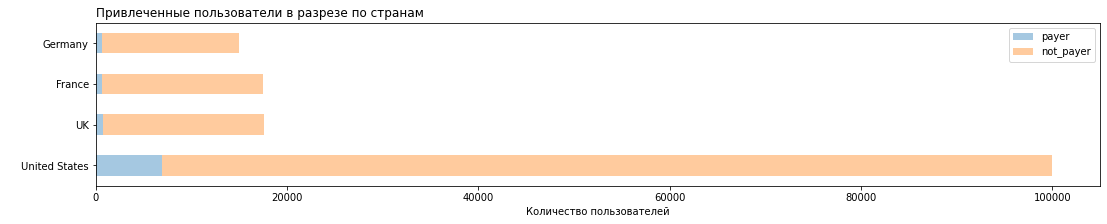

payer          not_payer  payer  payer_share
region                                      
United States      93100   6902         6.90
UK                 16875    700         3.98
France             16787    663         3.80
Germany            14365    616         4.11

In [51]:
# Построим горизонтальную столбчатую диаграмму, 
# отображающую количество платящих и неплатящих пользователей по регионам, 
# долю платящих пользователей в процентах
fig, ax = plt.subplots(figsize=(18, 3))
region[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе по странам',loc='left')
plt.show()

region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region

**Вывод**

1. Количество неплатящих пользователей:
- В Соединенных Штатах больше всего не платящих пользователей (93100), в то время как в Великобритании и Франции их количество сопоставимо меньше (16875 и 16787 соответственно).
- Наименьшее количество не платящих пользователей в Германии (14365), что может быть связано с особенностями рынка или стратегией маркетинга.

2. Доля платящих пользователей:
- США имеют самую высокую долю платящих пользователей (6.90%), что может указывать на более высокий уровень монетизации или более успешные маркетинговые кампании.
- Франция имеет наименьшую долю платящих пользователей (3.80%), что может требовать дополнительного исследования для выявления причин.

На основе этих данных можно сделать вывод, что США являются наиболее перспективным рынком с точки зрения монетизации, в то время как другие регионы требуют дополнительного анализа и, возможно, корректировки маркетинговых стратегий.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства

In [52]:
# Составим сводную таблицу по устройствам пользователей
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

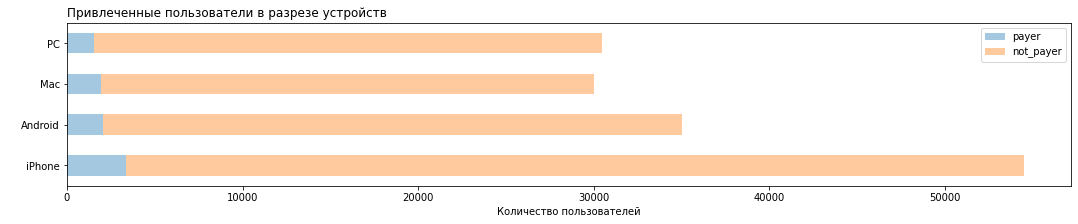

payer    not_payer  payer  payer_share
device                                
iPhone       51097   3382         6.21
Android      32982   2050         5.85
Mac          28130   1912         6.36
PC           28918   1537         5.05

In [53]:
# Построим горизонтальную столбчатую диаграмму по платящим и не платящим пользователям 
# в зависимости от устройства
fig, ax = plt.subplots(figsize=(18, 3))
device[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе устройств',loc='left')
plt.show()

device['payer_share'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)
device

**Вывод**

- Устройства iPhone имеют самое высокое количество не платящих пользователей и самую высокую долю платящих пользователей (6.21%).
- Устройства Android также показывают высокий процент платящих пользователей (5.85%), но их количество ниже, чем у пользователей iPhone.
- Пользователи PC и Mac также имеют высокую долю платящих пользователей, но их общее количество также ниже, чем у пользователей мобильных устройств.

#### Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [54]:
# Составим сводную таблицу по источникам привлечения
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

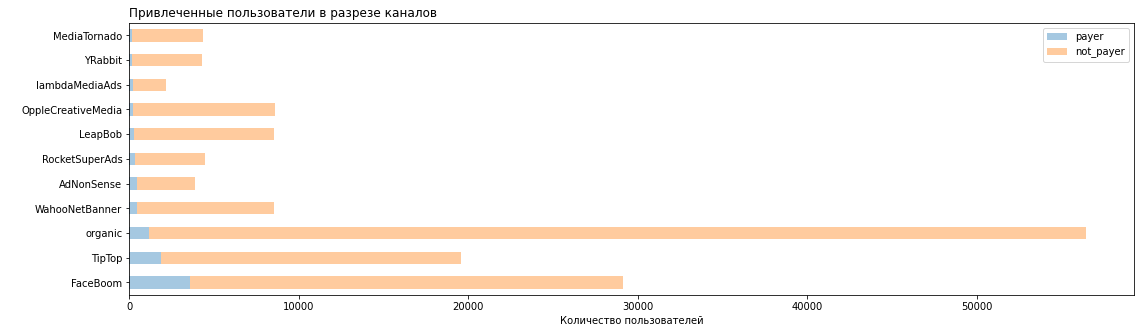

payer               not_payer  payer  payer_share
channel                                          
FaceBoom                25587   3557        12.20
TipTop                  17683   1878         9.60
organic                 55279   1160         2.06
WahooNetBanner           8100    453         5.30
AdNonSense               3440    440        11.34
RocketSuperAds           4096    352         7.91
LeapBob                  8291    262         3.06
OppleCreativeMedia       8372    233         2.71
lambdaMediaAds           1924    225        10.47
YRabbit                  4147    165         3.83
MediaTornado             4208    156         3.57

In [55]:
# Построим горизонтальную столбчатую диаграмму по платящим и не платящим пользователям 
# в зависимости от источника привлечения
fig, ax = plt.subplots(figsize=(18, 5))
channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе каналов',loc='left')
plt.show()

channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)
channel

**Вывод**

- Каналы привлечения с наибольшей долей платящих пользователей: FaceBoom (12.20%), AdNonSense (11.34%) и lambdaMediaAds (10.47%).
- Органический трафик имеет низкую долю платящих пользователей (2.06%), что может быть связано с тем, что пользователи из этого канала менее склонны к совершению покупок.
- Другие каналы, такие как WahooNetBanner, RocketSuperAds и YRabbit, имеют средние доли платящих пользователей (от 5% до 7%).

Таким образом, 
- больше всего приходит пользователей из США, и они лучше других конвертируется;
- большая часть пользователей заходит с мобильных устройств;
- наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей;
- каналы привлечения с наибольшей долей платящих пользователей: FaceBoom (12.20%), AdNonSense (11.34%) и lambdaMediaAds (10.47%);
- органический трафик имеет низкую долю платящих пользователей.

Получается, что больше всего приходит пользователей из США и они лучше других конвертируется. При этом большая часть пользователей заходит с мобильных устройств, это тоже стоит отметить. Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

### Маркетинг

#### Посчитаем общую сумму расходов на маркетинг.

In [56]:
# Выведем общую сумму затрат на рекламу
print(f'Общая сумма затрат на рекламу: {costs.costs.sum().round()}')

Общая сумма затрат на рекламу: 105497.0


#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [57]:
# Определим сколько потрачено денег на каждый рекламный источник
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

In [58]:
# Сгруппируем данные по каналам и посчитаем сумму затрат для каждого канала
costs_grouped = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
# Вычислим общую сумму затрат на все каналы
total_costs = costs_grouped['costs'].sum()
# Рассчитаем долю затрат каждого канала в общей сумме
costs_grouped['share'] = costs_grouped['costs'] / total_costs
costs_grouped

costs     share
channel                               
TipTop              54751.30  0.518983
FaceBoom            32445.60  0.307549
WahooNetBanner       5151.00  0.048826
AdNonSense           3911.25  0.037074
OppleCreativeMedia   2151.25  0.020392
RocketSuperAds       1833.00  0.017375
LeapBob              1797.60  0.017039
lambdaMediaAds       1557.60  0.014764
MediaTornado          954.48  0.009047
YRabbit               944.22  0.008950

Теперь нагляднее видно, что основная часть бюджета ушла на два канала.

- TipTop и FaceBoom являются двумя основными каналами, потребляющими значительную часть рекламного бюджета. Совместно они составляют более 80% всех затрат (TipTop — 51.90%, FaceBoom — 30.75%).
- WahooNetBanner, AdNonSense, OppleCreativeMedia, RocketSuperAds, и LeapBob имеют долю затрат от 1.70% до 4.88%.
- Каналы с наименьшими затратами включают lambdaMediaAds, MediaTornado, и YRabbit — каждый с долей менее 2%.

Таким образом, высокие затраты на TipTop и FaceBoom требуют анализа их эффективности и возврата на инвестиции (ROI). Если ROI для этих каналов низкий, необходимо пересмотреть их бюджеты и стратегии.
Низкие затраты на такие каналы, как MediaTornado и YRabbit, могут свидетельствовать о ограниченном охвате или меньшей важности в текущей маркетинговой стратегии. Важно оценить их потенциальный вклад и возможности для улучшения.

#### Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

In [59]:
# Создадим новый столбец week, преобразуем тип данных
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week

In [60]:
# Определим сколько потрачено всего денег по неделям
costs.groupby('week').agg({'costs': 'sum'})

costs
week          
18    1455.640
19    2031.820
20    1976.320
21    2297.120
22    3427.075
23    2915.740
24    2706.390
25    3421.390
26    4837.120
27    4660.335
28    3516.835
29    3039.780
30    3445.460
31    4609.530
32    4446.835
33    4703.960
34    4670.370
35    4732.160
36    4280.635
37    4227.870
38    5473.535
39    6784.580
40    6365.370
41    5190.355
42    4679.935
43    5601.140

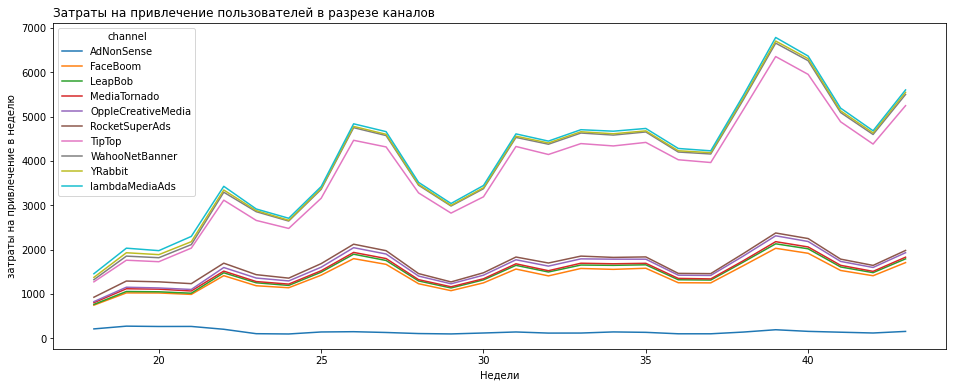

In [61]:
# Построим график еженедельных затрат по каналам
fig, ax = plt.subplots(figsize=(16, 6))

(costs
 .pivot_table(
    index='week',
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_title('Затраты на привлечение пользователей в разрезе каналов', loc='left')
ax.set_ylabel('затраты на привлечение в неделю')
ax.set_xlabel('Недели')
plt.show()

- Средние затраты за весь период составляют около 4000 единиц. Это предполагает средний уровень затрат на каждую неделю.
- Максимальные затраты были за неделю 39, превысив 6700 единиц, в то время как минимальные затраты были за неделю 18, составив около 1455 единиц.
- Недели 22, 26, 27, 31 и 39 имеют особенно высокие расходы.
- Наибольший рост расходов наблюдался в каналах lambdaMediaAds,TipTop, YRabbit, WahooNetBanner.

In [62]:
# Создадим новый столбец month
costs['month'] = costs['dt'].dt.month

In [63]:
# Определим, сколько потрачено всего денег по месяцам
costs.groupby('month').agg({'costs': 'sum'})

costs
month           
5       9978.570
6      15090.045
7      16447.060
8      20657.870
9      22441.340
10     20882.415

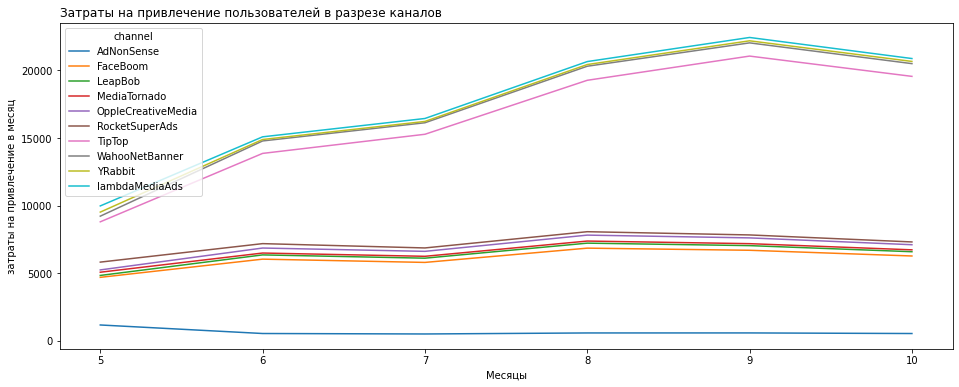

In [64]:
# Построим график ежемесячных затрат по каналам
fig, ax = plt.subplots(figsize=(16, 6))

(costs
 .pivot_table(
    index='month',
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_title('Затраты на привлечение пользователей в разрезе каналов', loc='left')
ax.set_ylabel('затраты на привлечение в месяц')
ax.set_xlabel('Месяцы')
plt.show()

- Динамика затрат на рекламу по месяцам:  затраты на рекламу увеличиваются с мая по сентябрь, после чего начинают снижаться к октябрю.
- Максимальные затраты на рекламу за месяц были в сентябре, а минимальные - в мае.
- Рост затрат с мая по сентябрь по каналам TipTop, lambdaMediaAds, YRabbit, WahooNetBanner.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [65]:
# Рассчитаем средний CAC на одного пользователя для всего проекта, используя профили пользователей, 
# но без канала оrganic, так как  этот канал привлечения приложению ничего не стоит.

cac_person = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .agg({'acquisition_cost': 'mean'})
             )
cac_person

acquisition_cost    1.127481
dtype: float64

Средний САС по проекту на одного пользователя составляет 1.127481.

In [66]:
# Рассчитаем средний САС для каждого источника
cac_channel = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )
cac_channel

cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172
organic             0.000000

**Вывод**

- Общая сумма затрат на рекламу: 105497.0 единиц.
- Среднее значение стоимости привлечения клиента (CAC) из каждого источника составляет 1.13 единиц.
- TipTop является самым затратным каналом (2.8 единиц), с затратами почти в три раза выше, чем у следующего по стоимости канала - FaceBoom (1.11 едтниц).
- Можно заметить, что большая часть бюджета тратится на несколько каналов (TipTop	2.799003, FaceBoom	1.113286, AdNonSense 1.008054), в то время как остальные каналы получают гораздо меньше финансирования.
- Затраты на органический трафик равны нулю, потому что органический трафик генерируется без прямых затрат на рекламу.
- На первый взгляд кажется, что TipTop может быть наиболее эффективным каналом, учитывая его высокие затраты. Однако для полного анализа нужно учитывать не только стоимость, но и количество привлеченного трафика или конверсий.
- Каналы TipTop и FaceBoom имеют наибольшие значения CAC, что означает, что привлечение клиентов через эти каналы обходится дороже всего.
- Каналы YRabbit, MediaTornado, LeapBob и органический трафик имеют низкие значения CAC, что может указывать на их относительную эффективность в привлечении клиентов по сравнению с другими каналами.


Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.


### Оценим окупаемость рекламы


Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Определим необходимость включения в анализ органических пользователей.

Установим момент и горизонт анализа данных. Анализ проведем по состоянию на 27 октября 2019, потому что данные есть

In [67]:
# момент анализа
observation_date = datetime(2019, 10, 27).date()
observation_date

datetime.date(2019, 10, 27)

In [68]:
# горизонт анализа
analysis_horizon = 14

In [69]:
# создание опции «игнорировать горизонт»
ignore_horizon = False

In [70]:
# Посчитаем минимальную дату привлечения пользователей
min_analysis_date = costs['dt'].min()

In [71]:
# Посчитаем максимально возможную дату привлечения с учётом горизонта
max_analysis_date= observation_date - timedelta(days=analysis_horizon - 1)

In [72]:
# Выведем минимальную и максимальную дату привлечения 
print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей: 2019-10-14


- Минимальная дата привлечения пользователей: 2019-05-01
- Максимальная дата привлечения пользователей: 2019-10-14

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [73]:
# Так как органические пользователи ничего не стоят для платформы, исключим их  из таблицы
profiles = profiles.query('channel != "organic"')

Поскольку мы за них ничего не платим,  а нам нужно изучить именно окупаемость рекламы. 


In [74]:
# Создадим функция для сглаживания датафрейма

def filter_data(df, window):
    # Для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


In [75]:
# Создадим функцию для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # Задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # Из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Стоимость привлечения запишем в отдельный датафрейм
    cac_history = roi_history[['cac']]

    # Из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # Первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    # Второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # Столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # Третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # Столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # Четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    
    # Пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # Столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

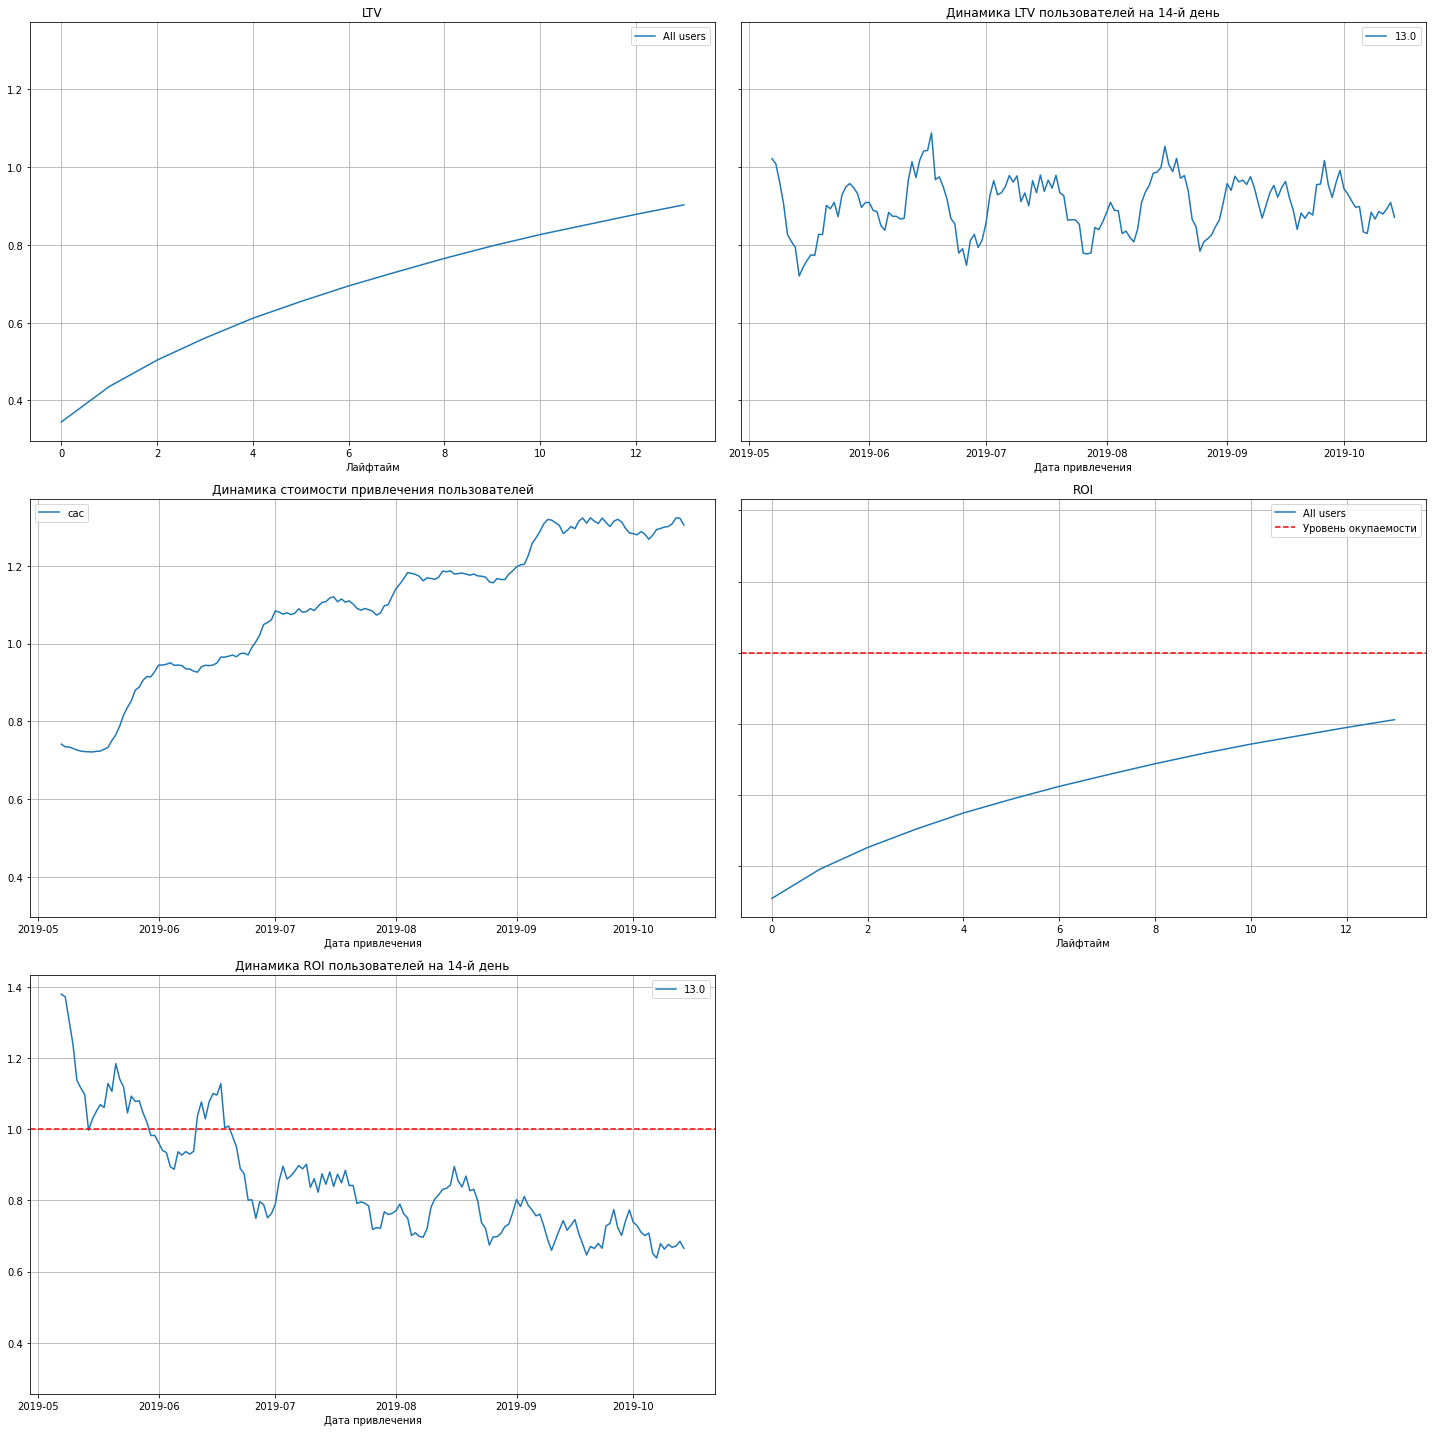

In [76]:
# Посчитаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# Построим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

По графикам видно, что:
1. Динамика ROI на 14-й день и далее снижается:

- Снижение ROI (возврата на инвестиции) после 14-го дня может указывать на то, что первоначально привлеченные пользователи более ценны, чем те, кто привлекается позже. Это может быть связано с качеством привлеченного трафика, изменениями в маркетинговой кампании или другими факторами.

2. ROI находится ниже уровня окупаемости:
- Если ROI ниже уровня окупаемости, это означает, что затраты на привлечение клиентов превышают доходы, которые эти клиенты приносят. Это является серьезной проблемой, так как указывает на то, что текущие маркетинговые стратегии не являются устойчивыми в долгосрочной перспективе.

3. Динамика стоимости привлечения пользователей постепенно увеличивалась:
- Рост стоимости привлечения пользователей (CAC) может быть связан с увеличением конкуренции, изменениями в маркетинговой стратегии или использованием менее эффективных каналов. Это требует пересмотра текущих маркетинговых стратегий и, возможно, перераспределения бюджета.

4. LTV достаточно стабильно растет:
- Стабильный рост LTV (жизненной стоимости клиента) является положительным сигналом, указывающим на то, что клиенты приносят все больше дохода на протяжении времени. Это может компенсировать рост CAC, если LTV растет быстрее, чем CAC.

Рекомендации по  маркетинговым стратегиям по итогам графиков

- Проведение аудита текущих маркетинговых стратегий и определение каналов, приносящих наибольший ROI и наименьший CAC.
- Увеличение инвестиции в более эффективные каналы и уменьшение финансирование менее эффективных.
- Оптимизация расходов на привлечение клиентов, сфокусировавшись на тех каналах и кампаниях, которые приносят наибольший LTV.
- Рассмотрение возможности тестирования новых маркетинговых каналов и стратегий для снижения CAC.
- Анализ и сегментация целевой аудитории, чтобы лучше понимать, какие группы приносят наибольший доход.
- Настройка рекламных кампании таким образом, чтобы привлекать более ценных клиентов.
- Разработка стратегии для улучшения удержания клиентов, такие как программы лояльности, персонализированные предложения и улучшение клиентского опыта.
- Увеличение удержания клиентов может способствовать росту LTV и улучшению ROI.
- Регулярное отслеживание ключевых метрик, таких как ROI, CAC и LTV, чтобы своевременно реагировать на изменения и корректировать стратегии.

Наблюдаем, что динамика ROI за лайфтайм падает. При относительно стабильной динамике LTV, динамика САС растёт с мая по конец октября. Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.


#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

In [77]:
# Построим функцию для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # Задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # Исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # В таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # Первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # Второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # Столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [78]:
# Постороим функцию для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # Задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # Исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # В таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # Если в индексах таблицы удержания только payer,
    # Добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # В таблице графиков — два столбца и две строки, четыре ячейки
    # В первой построим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # Во второй ячейке построим кривые удержания неплатящих
    # Вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
        )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # В третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # Получим названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # Отфильтруем данные и построим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    # В чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # Отфильтруем данные и построим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

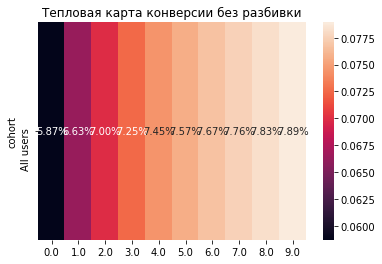

In [79]:
# Посчитаем конверсию без параметра dimensions на 27.10.2019
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 10, 27).date(), 10
)

# Построим хитмэп по таблице конверсии
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии без разбивки')
plt.show()

Общая конверсия растёт: от 5.87 % в первый день «жизни» пользователей до 7.89 % на десятый день. Это указывает на успешное удержание пользователей и увеличение их вовлеченности с течением времени. В первый день конверсия составляет 5.87%, что может быть обусловлено интересом новых пользователей к продукту или сервису. Это также может указывать на эффективность начальных маркетинговых усилий.

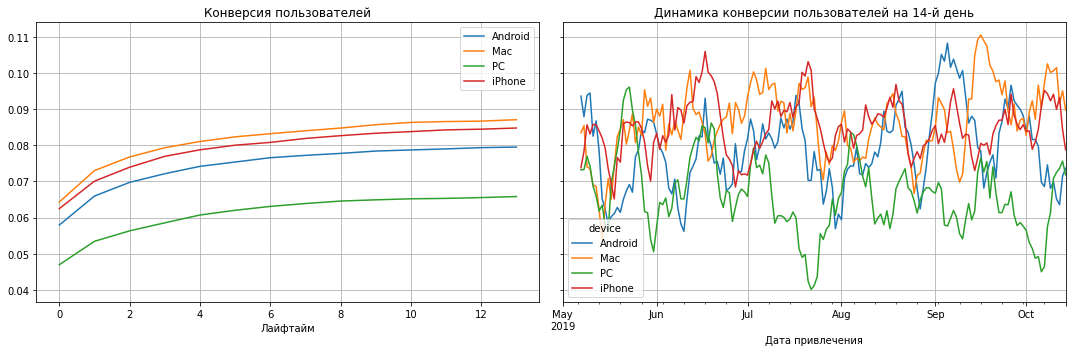

In [80]:
# Посмотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

- Устройства Mac и iPhone демонстрируют высокую конверсию, что может свидетельствовать о лояльности пользователей к продукции Apple или об удобстве использования вашего приложения/сайта на этих устройствах.
- Хотя конверсия на PC ниже, чем на Mac и iPhone, она все равно остается значительной. Это важно учитывать при разработке маркетинговых стратегий.

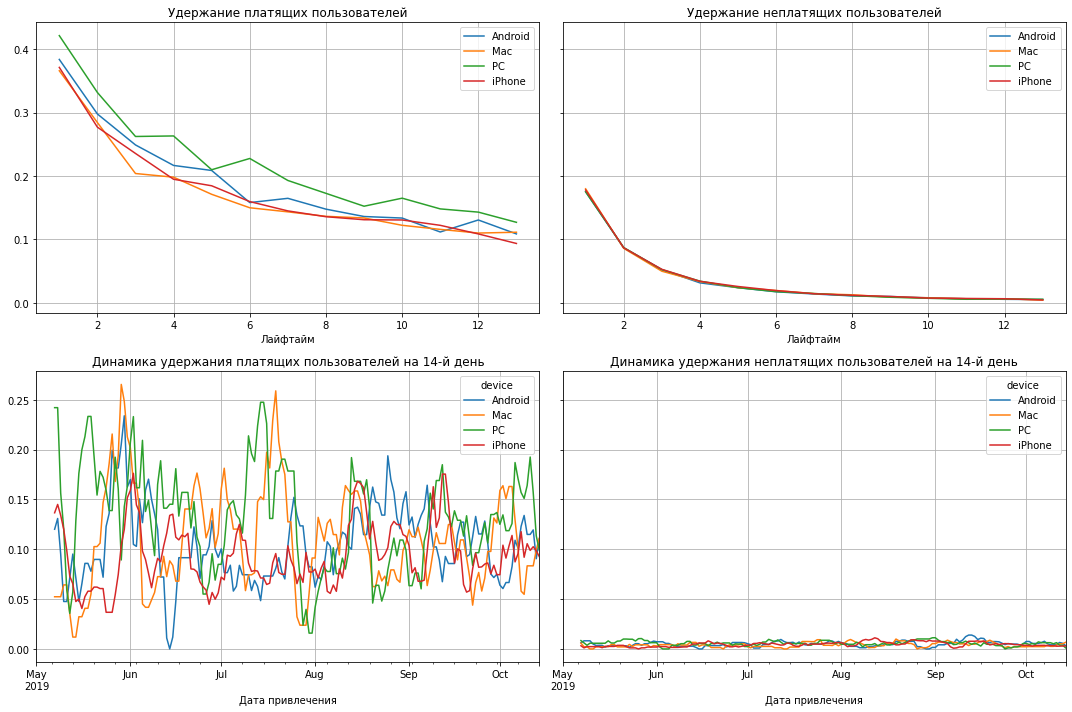

In [81]:
# Посмотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

- Кривая удержания пользователей показывает снижение как для платящих, так и для неплатящих пользователей. Это обычная тенденция, так как с течением времени интерес к продукту или сервису может уменьшаться.
- Динамика удержания неплатящих пользователй на 14 день практически достигла нуля, что указывает на низкую вовлеченность или недостаток ценности продукта для этой группы пользователей. 
- Платящие пользователи на 14 день показывают пики удержания с мая по июль, что может быть связано с сезонными факторами или маркетинговыми кампаниями в этот период.
- Снижение удержания платящих пользователей на 14 день с августа по октябрь может указывать на уменьшение интереса или эффективность маркетинговых усилий в этот период.
- Платящие пользователи, демонстрирующие пики удержания, используют Mac и PC, что может быть полезным для таргетирования маркетинговых кампаний.

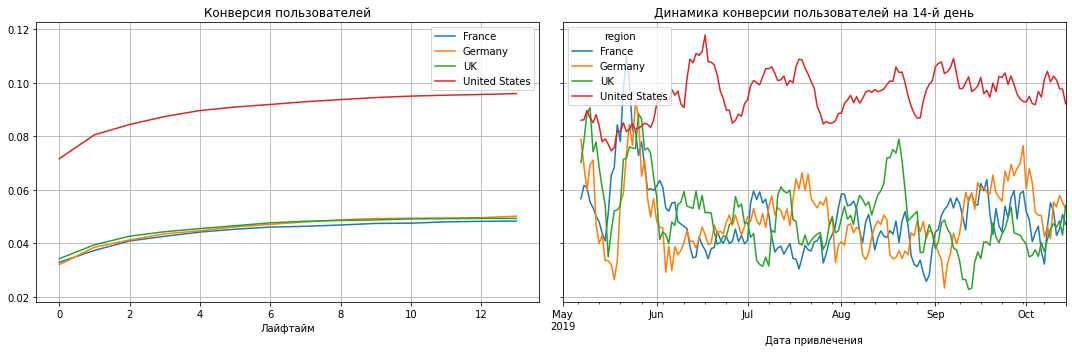

In [82]:
# Посмотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

- Конверсия пользователей из Франции, Германии, Великобритании и США растет, что свидетельствует об увеличении вовлеченности пользователей в этих странах.
- Конверсия пользователей из США выше, чем у остальных стран. Это может указывать на успешные маркетинговые стратегии или более высокий интерес к продукту/сервису в этой стране.
- Пользователи из США демонстрируют наибольшую динамику конверсии на 14-й день, что может быть связано с эффективностью удержания пользователей или особенными предложениями, доступными на этом рынке.

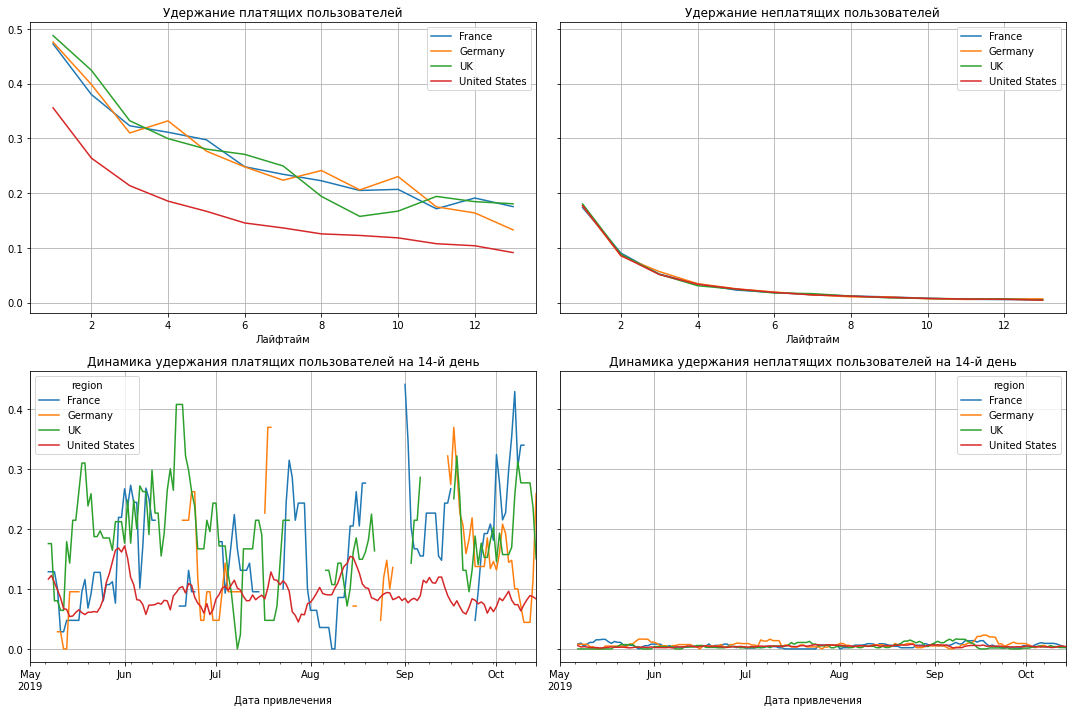

In [83]:
# Посмотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

- Несмотря на высокую конверсию, платящие пользователи в США демонстрируют низкий уровень удержания. Это может свидетельствовать о проблемах с удовлетворенностью клиентов, качеством продукта или сервисными предложениями.
- Удержание неплатящих пользователей не показывает значительных отличий ни по типу устройства, ни по региону, что может указывать на то, что другие факторы (например, качество контента или предложения) играют решающую роль.

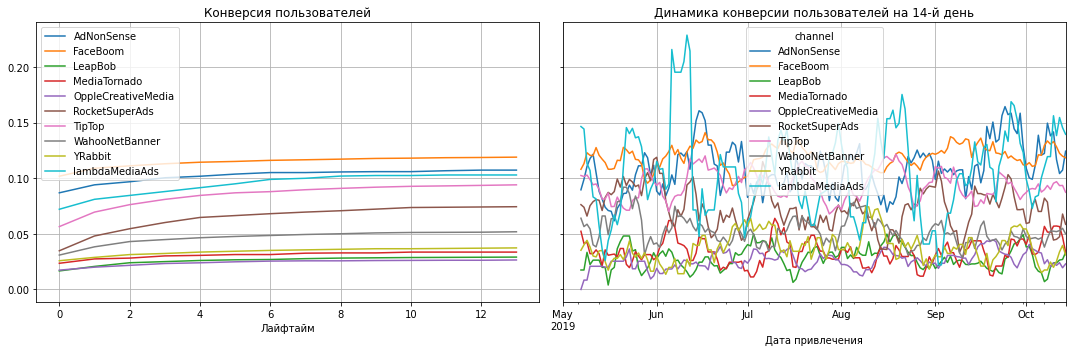

In [84]:
# Рассмотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

- Конверсия пользователей  показывают рост показателя по каналам. AdNonSense, FaceBoom и TipTop показывают наибольший рост среди всех каналов. WahooNetBanner и lambdaMediaAds демонстрируют меньший, но все равно положительный рост.
- По динамике конверсий пользоватеей на 14 день можно наблюдать значительные колебания в показателях, что может быть связано с удержанием пользователей или другой метрикой, подверженной частым изменениям. AdNonSense показывает высокую изменчивость с заметными пиками, что может указывать на нестабильное удержание или конверсию пользователей. Другие каналы, такие как FaceBoom и TipTop, показывают менее изменчивую динамику, что может говорить о более стабильных показателях.

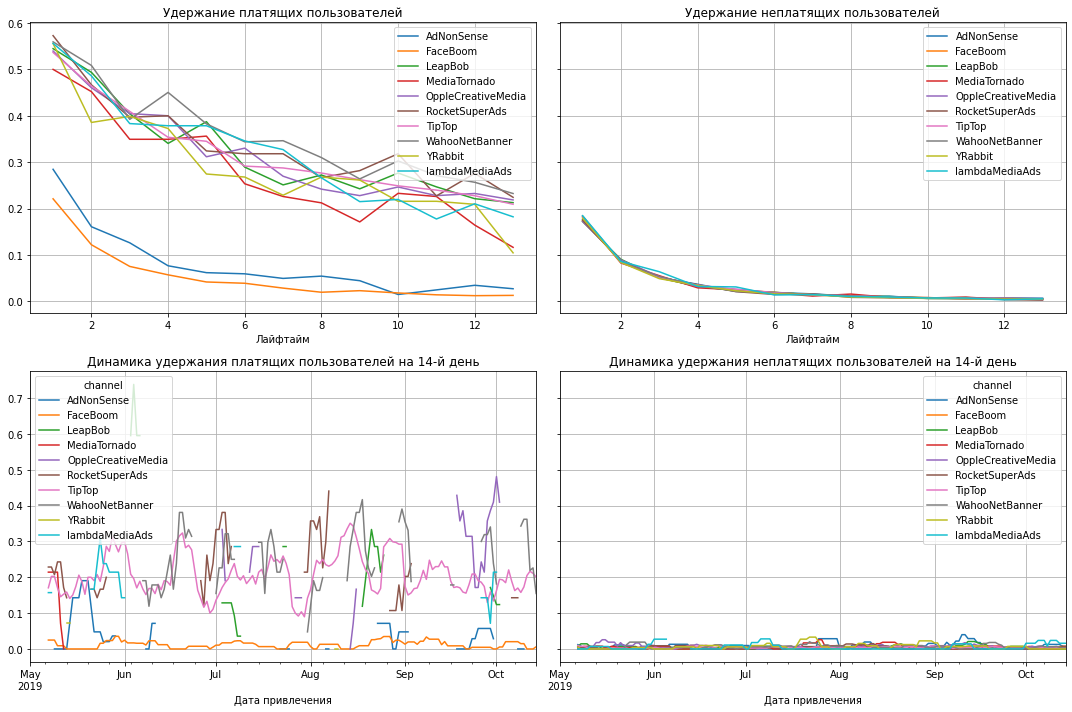

In [85]:
# Посмотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

- Удержание платящих пользоватеелй показывает, что все каналы демонстрируют тенденцию к снижению показателя  со временем.Канал AdNonSense показывает наибольшее снижение показателей, за ним следует FaceBoom.
- На графике удержания неплатящих пользователей наблюдается более равномерное снижение показателей, которое постепенно уменьшается по всем каналам.
- На графике динамики удержания платящих пользователей на 14 день видно значительные колебания показателей по различным каналам. Это может свидетельствовать о более динамичных метриках, таких как ежедневная активность или временные изменения в удержании.
- График динамики удержания неплатящих пользователей на 14 день  показывает низкие и стабильные показатели по всем каналам. 
- У всех каналов наблюдается тенденция к снижению удержания пользователей со временем. Каналы AdNonSense и FaceBoom показывают наибольшее снижение.
- На отдельных графиках видна высокая изменчивость показателей, что может указывать на нестабильность в поведении пользователей.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [86]:
# Создаем сводную таблицу с количеством пользователей для каждой комбинации каналов и устройств
(
     profiles
     .pivot_table(index='channel',
                  columns='device',
                  aggfunc={'user_id': 'count'}
                 )
     .sort_values(by=('user_id', 'Mac'), 
                  ascending=False)
 ).div(
     profiles
     .pivot_table(columns='device',
                  aggfunc={'user_id': 'count'}
                 )
     .values
 ).fillna(0).style.format('{:.2%}')

- FaceBoom: Этот канал имеет самое высокое процентное соотношение пользователей с устройствами Mac и iPhone. Это может указывать на то, что эта аудитория предпочитает использовать устройства Apple для доступа к этому каналу.

- TipTop: Здесь также высокий процент пользователей с устройствами Mac и iPhone, но доля пользователей с Android и PC немного выше, чем в канале FaceBoom.

- RocketSuperAds и MediaTornado: Эти каналы имеют более низкие процентные доли пользователей с устройствами Mac и iPhone, но более высокие доли пользователей с устройствами Android и iPhone по сравнению с каналами TipTop и FaceBoom.

- OppleCreativeMedia, LeapBob и WahooNetBanner: Эти каналы привлекают больше пользователей с устройствами PC, чем другие каналы, и имеют более низкие процентные доли пользователей с устройствами Mac и iPhone.

- AdNonSense и lambdaMediaAds: Эти каналы также имеют низкие процентные доли пользователей с устройствами Mac и iPhone, но доля пользователей с устройствами PC ниже, чем в каналах OppleCreativeMedia, LeapBob и WahooNetBanner.

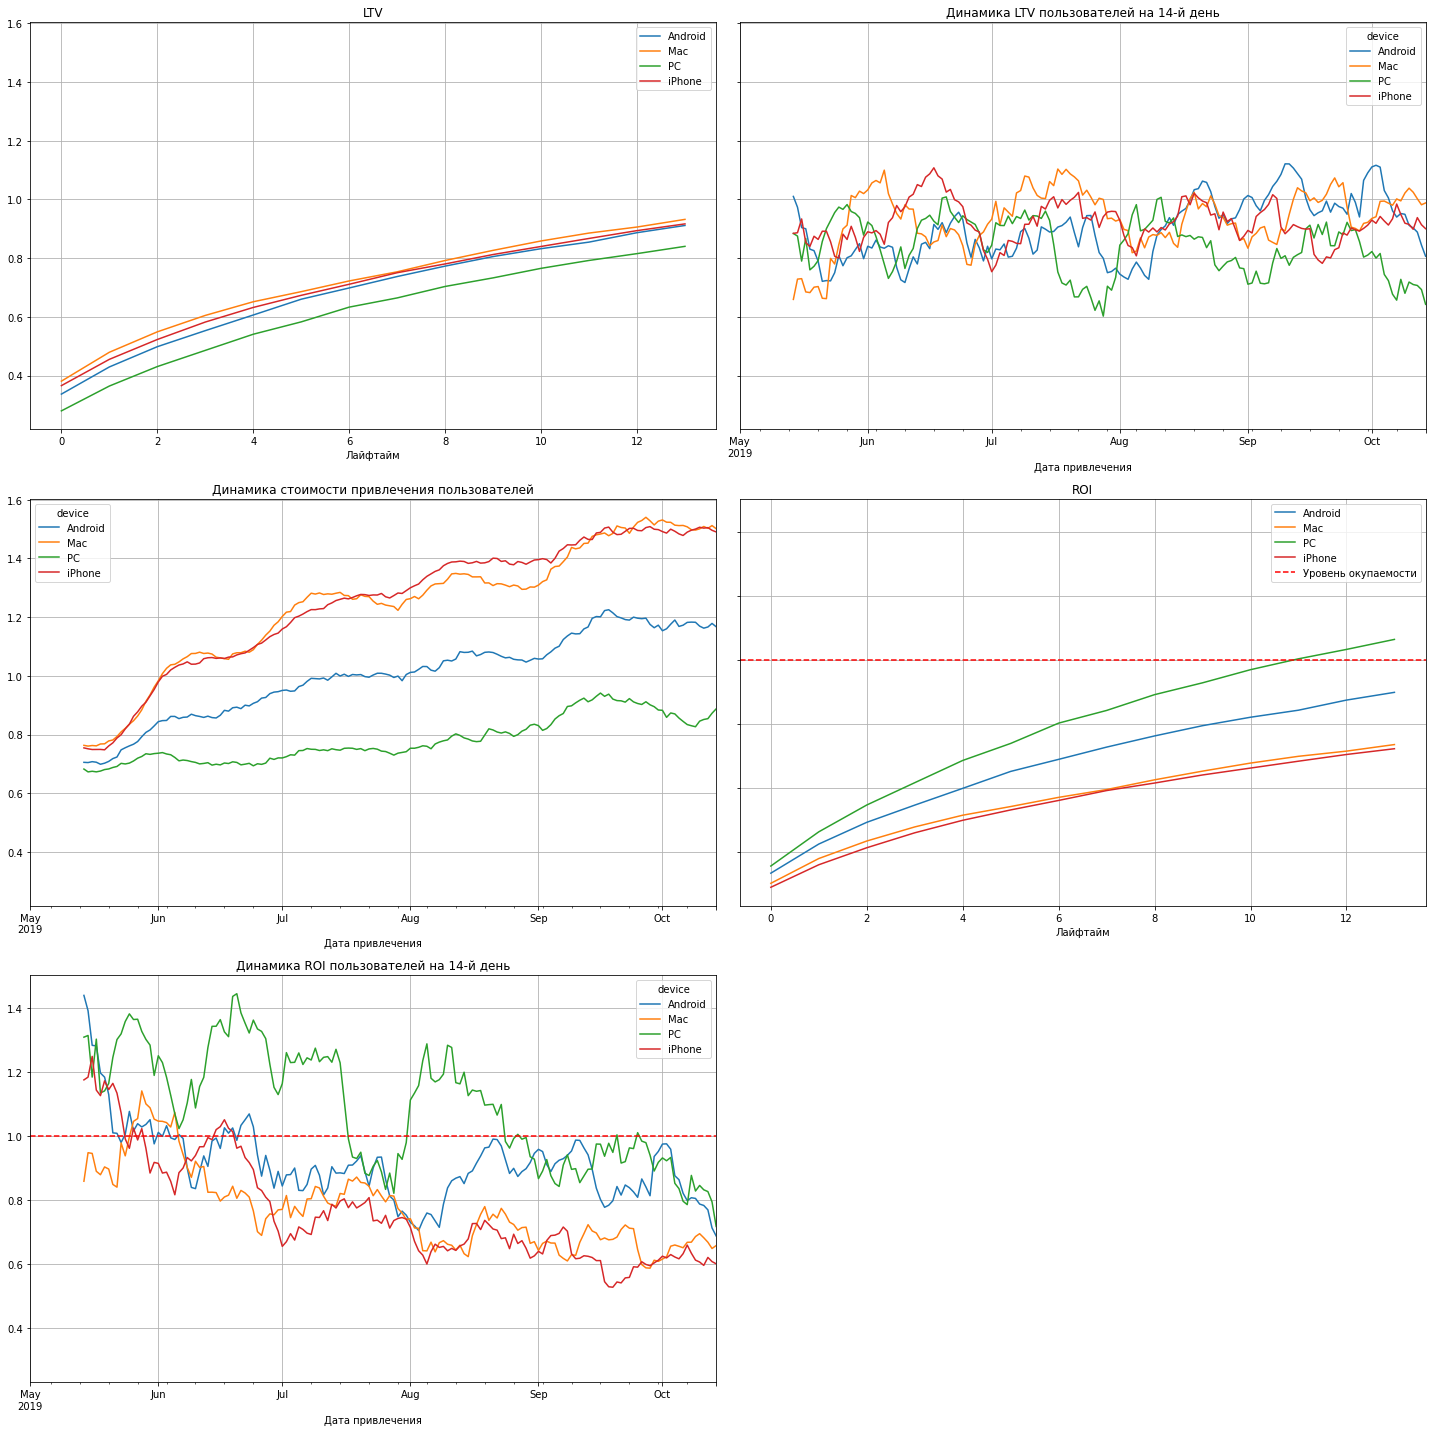

In [87]:
# Смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

- Общий тренд показывает, что LTV растет со временем на всех типах устройств. Однако, рост LTV на Mac является наиболее значительным, в то время как на PC этот рост менее заметен. Это может свидетельствовать о более активном использовании пользователей Mac продуктов и услуг компании в сравнении с пользователями PC.
- График динамики LTV пользователей на 14 день показывает, что есть колебания в этом показателе. Возможные причины колебаний могут быть связаны с сезонными факторами, изменениями в маркетинговых стратегиях или даже техническими проблемами на сайте или в приложении.
- График динамики стоимости привлечения пользователей показывает, что стоимость привлечения пользователей растет со временем для всех типов устройств. Наиболее высокая стоимость привлечения пользователей наблюдается для устройств iPhone и Mac. Это может быть связано с более высокой конкуренцией и ценой кликов в рекламных кампаниях, направленных на эти устройства.
- График ROI показывает, что только PC достигает уровня окупаемости на 11 день. Это может указывать на более эффективные маркетинговые стратегии или более низкие затраты на привлечение пользователей на устройствах PC.
- График динамики пользователей ROI на 14 день подтверждает нестабильность этого показателя. Более стабильные результаты в достижении уровня окупаемости наблюдаются у устройств PC. Пользователи iPhone и Android показывали окупаемость только в начальный период, что может быть связано с временными кампаниями или акциями, привлекающими внимание пользователей этих устройств.


С окупаемостью проблемы по всем устройствам кроме PC. Это значит, что у нас, по крайней мере, нет технических проблем, влияющих на монетизацию.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [88]:
# Создаем сводную таблицу с количеством пользователей для каждой комбинации каналов и регионов
(
(
     profiles
     .pivot_table(index='channel',
                  columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .sort_values(by=('user_id', 'United States'), 
                  ascending=False)
 ).div(
     profiles
     .pivot_table(columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .values
 ).fillna(0).style.format('{:.2%}'))

- FaceBoom и TipTop: Основные каналы в США, привлекающие наибольшее количество пользователей (78.78% суммарно).
- LeapBob, OppleCreativeMedia и WahooNetBanner: Основные каналы в Европе (France, Germany, UK), каждый из которых привлекает около 27% пользователей в этих странах.
- AdNonSense и lambdaMediaAds: Каналы с заметной долей пользователей в Европе, но отсутствуют в США.

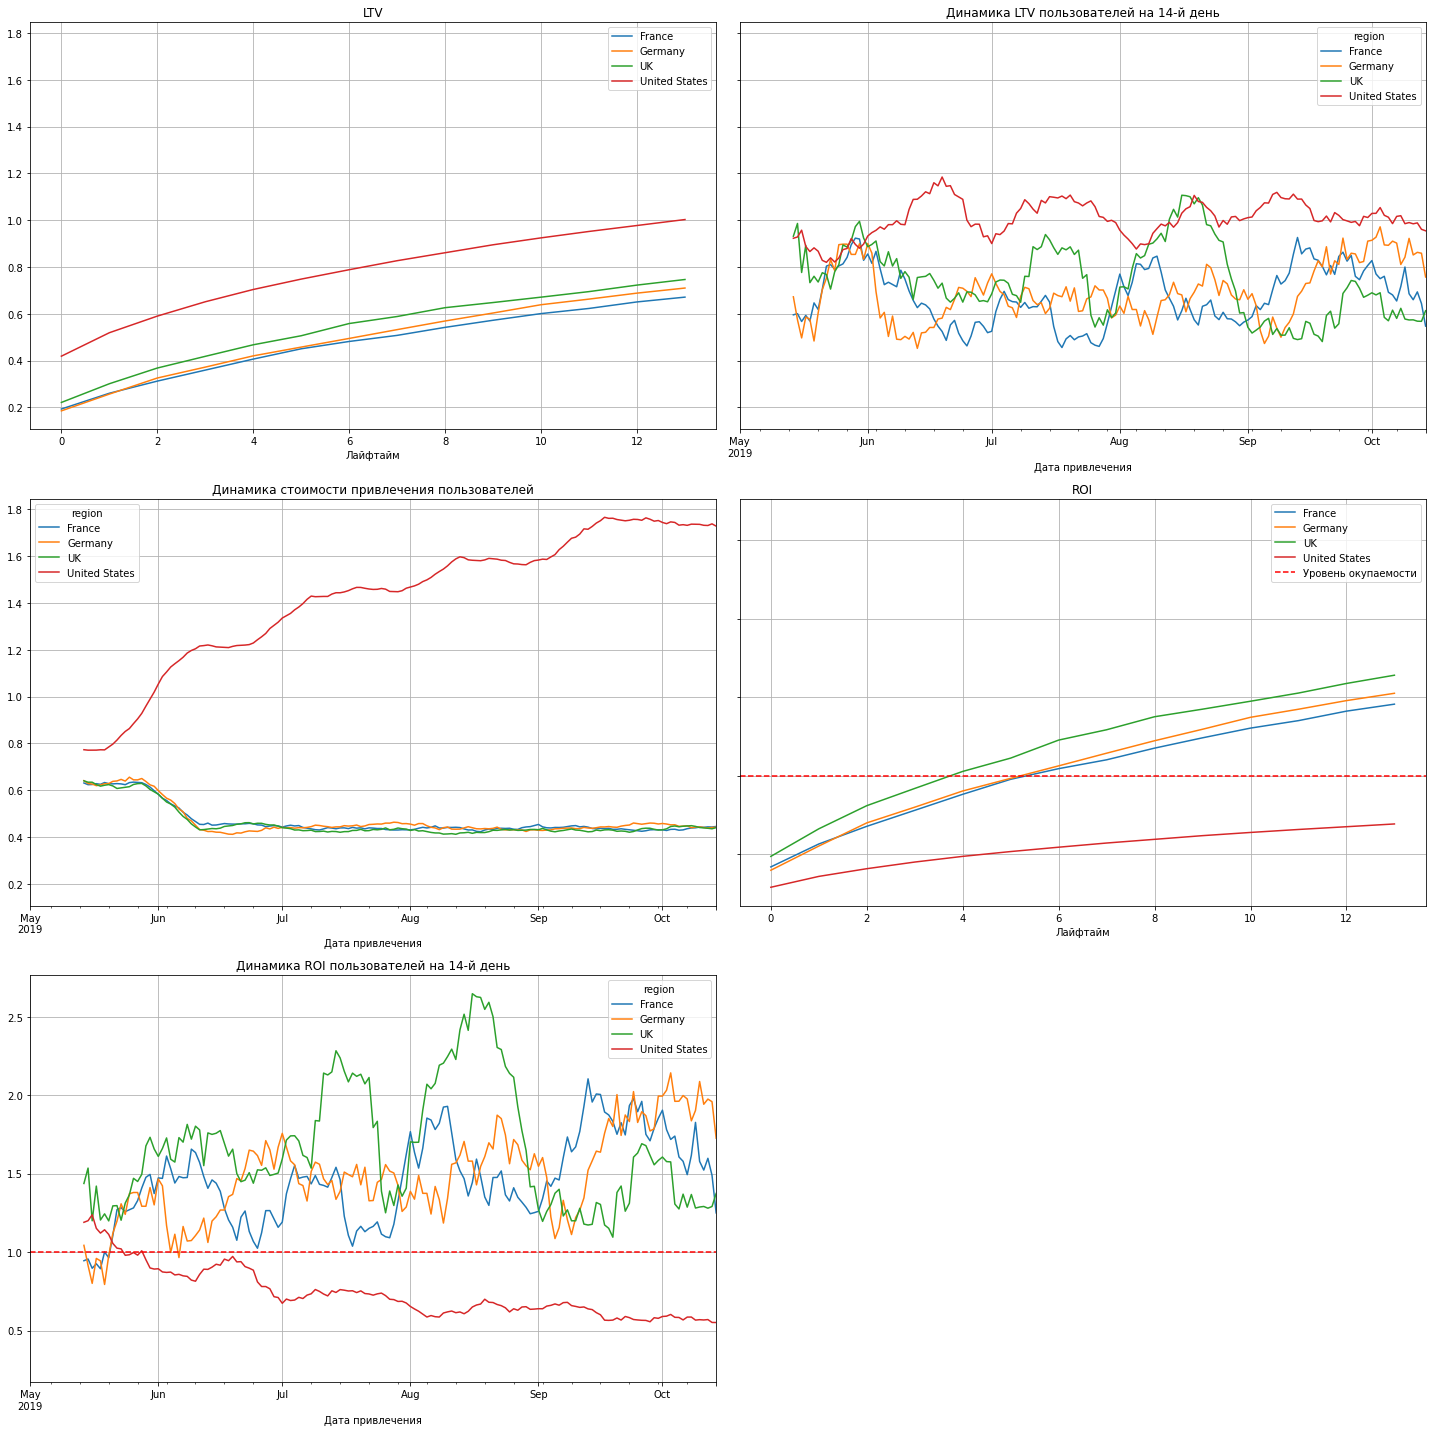

In [89]:
# Смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

- Несмотря на большое количество привлеченных пользователей из США динамика ROI пользователей на 14 день показывает снижение и отсутствие окупаемости
- Затраты на рекламу во Франции, Германии и Великобритании не меняются и показывают свою окупаемость, в США затраты растут и показывают отсутствие окупаемости с июня, возможно посредством роста затрат на рекламу в США.
- Реклама не окупилась только в США из 4 регионов. Динамика стоимости привлечения пользователей показывает огромный разрыв расходов в США по сравнению с другими странами; стоимость в США существенно выше. Динамика ROI показывает снижение окупаемости на пользователя из США ниже уровня безубыточности. Динамика LTV подвержена сезонности и стабильна. LTV в США выше, чем в других странах.

 Нужно разбираться детальнее с рекламой в США, тем более, что это наш основной рынок. 

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

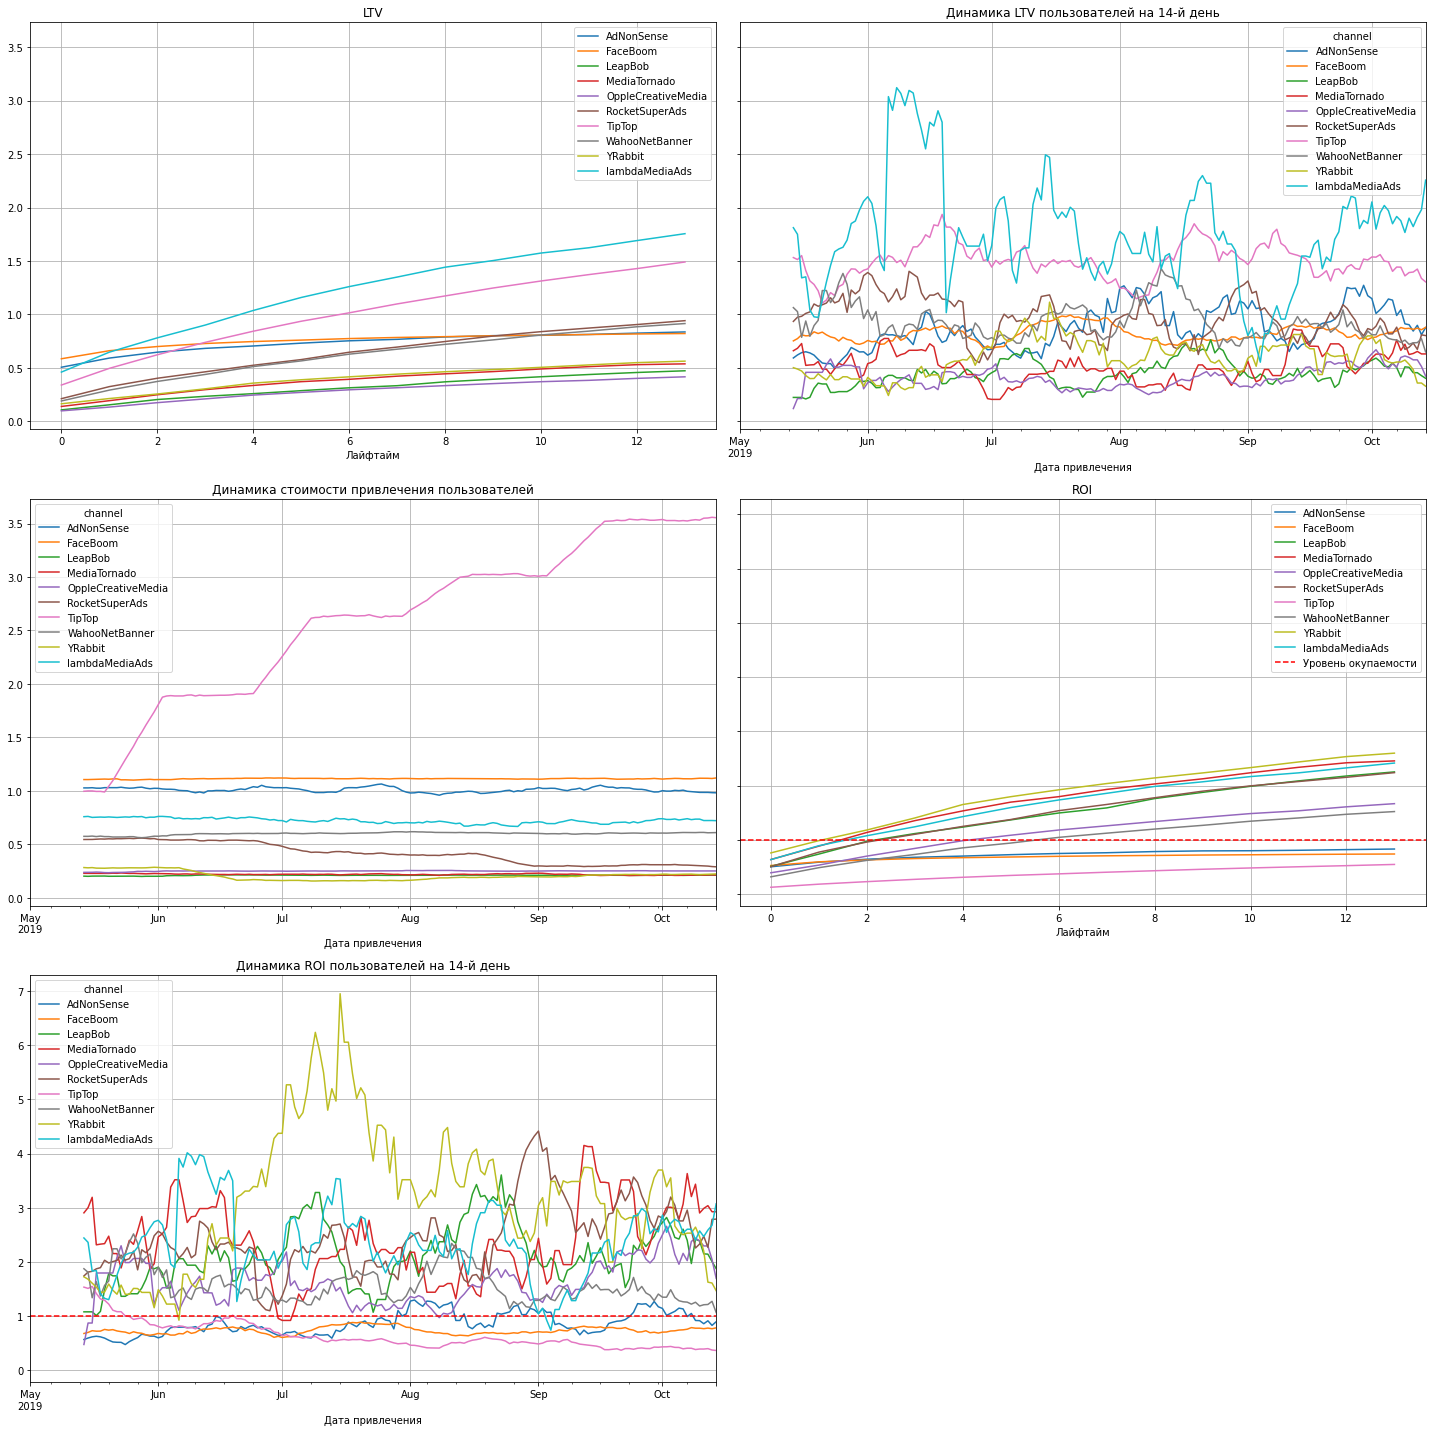

In [90]:
# Смотрим окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)


- Положительная динамика роста LTV (жизненной ценности клиента) lambdaMediaAds и TipTop и свидетельствует о том, что компания успешно увеличивает доход от каждого пользователя с течением времени. Это может быть вызвано улучшением продуктов или услуг, повышением лояльности клиентов и другими факторами.
- Сильные выбросы в динамике пользователей на 14 день lambdaMediaAds могут указывать на некоторую нестабильность или неожиданные события, которые повлияли на количество новых пользователей в определенный период времени. TipTop так же имеет высокие выбросы.
- Резкое увеличение стоимости привлечения пользователей у канала TipTop может быть вызвано увеличением конкуренции на рынке или изменениями в маркетинговой стратегии этого канала.
- Низкий ROI у канала TipTop может быть следствием высокой стоимости привлечения клиента и/или недостаточно высокой конверсии пользователей в платящих клиентов.
- Высокий ROI у канала YRabbit может указывать на эффективность этого канала в привлечении пользователей с низкими затратами и высоким доходом от них.
- Низкая динамика ROI пользователей на 14 день у каналов FaceBoom и TipTop может указывать на то, что пользователи, привлеченные через эти каналы, не окупаются в краткосрочной перспективе. Это может быть вызвано низкой конверсией или низкой лояльностью новых пользователей.

В целом, для дальнейшего улучшения показателей окупаемости компании следует обратить внимание на улучшение эффективности рекламных каналов с низким ROI и поиск причин нестабильности в динамике пользователей на 14 день.

Есть проблемы с каналом TipTop, видим значительный рост затрат на привлечение.

In [91]:
# Исключим из таблицы все страны, кроме США
profiles_USA = profiles.query('region == "United States"')

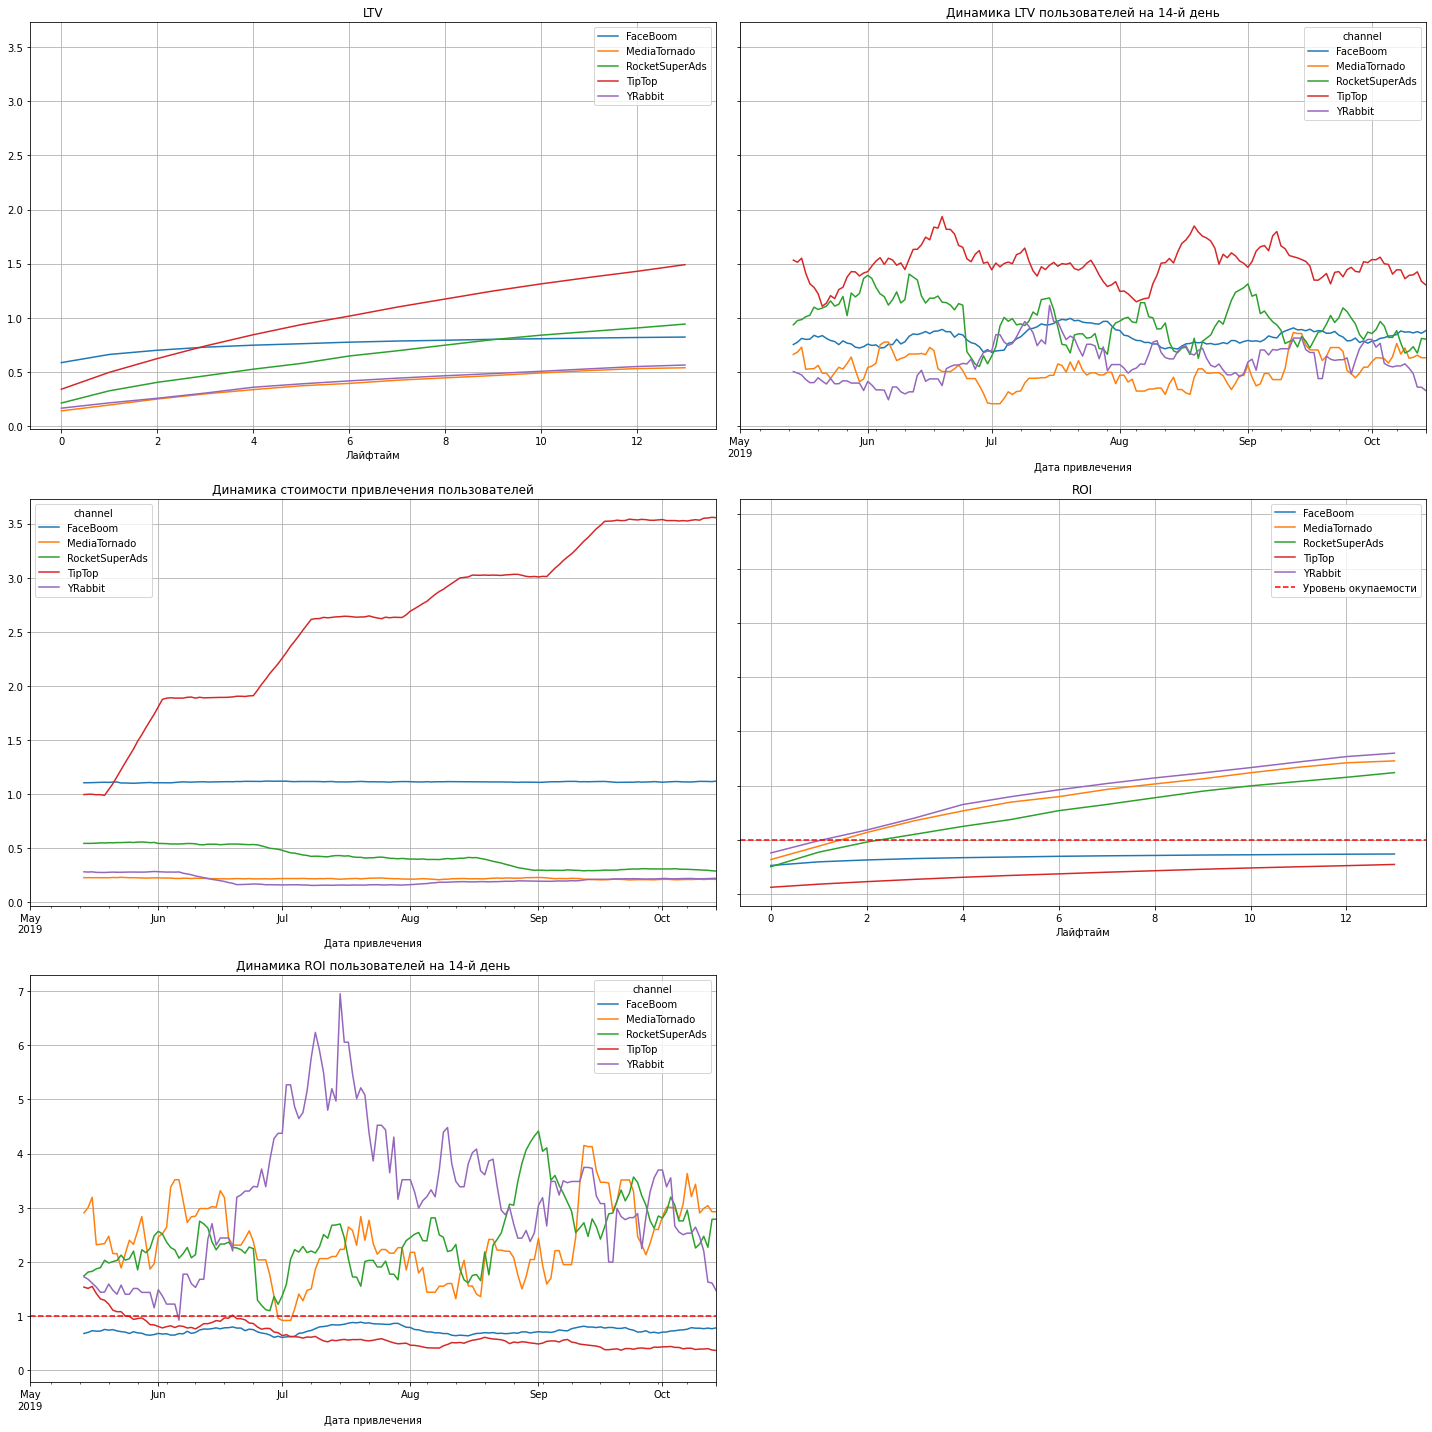

In [92]:
# Посмотрим окупаемость с разбивкой по источникам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14)

- В США динамика стоимости привлечения пользователей через TipTop была значительно выше, чем у других каналов, но расходы на рекламу не окупились.
- RocketSuperAds, MediaTornado и YRabbit в США: второстепенные каналы, но  так как они вместе составляют 21.22% пользователей, отметим что динамика привлечения ROI пользователей на 14 день YRabbit имеет сильный выброс в июле и выше уровня окупаемости, RocketSuperAds, MediaTornado так же окупаются, САС у данных каналов низкая, LTV средний.

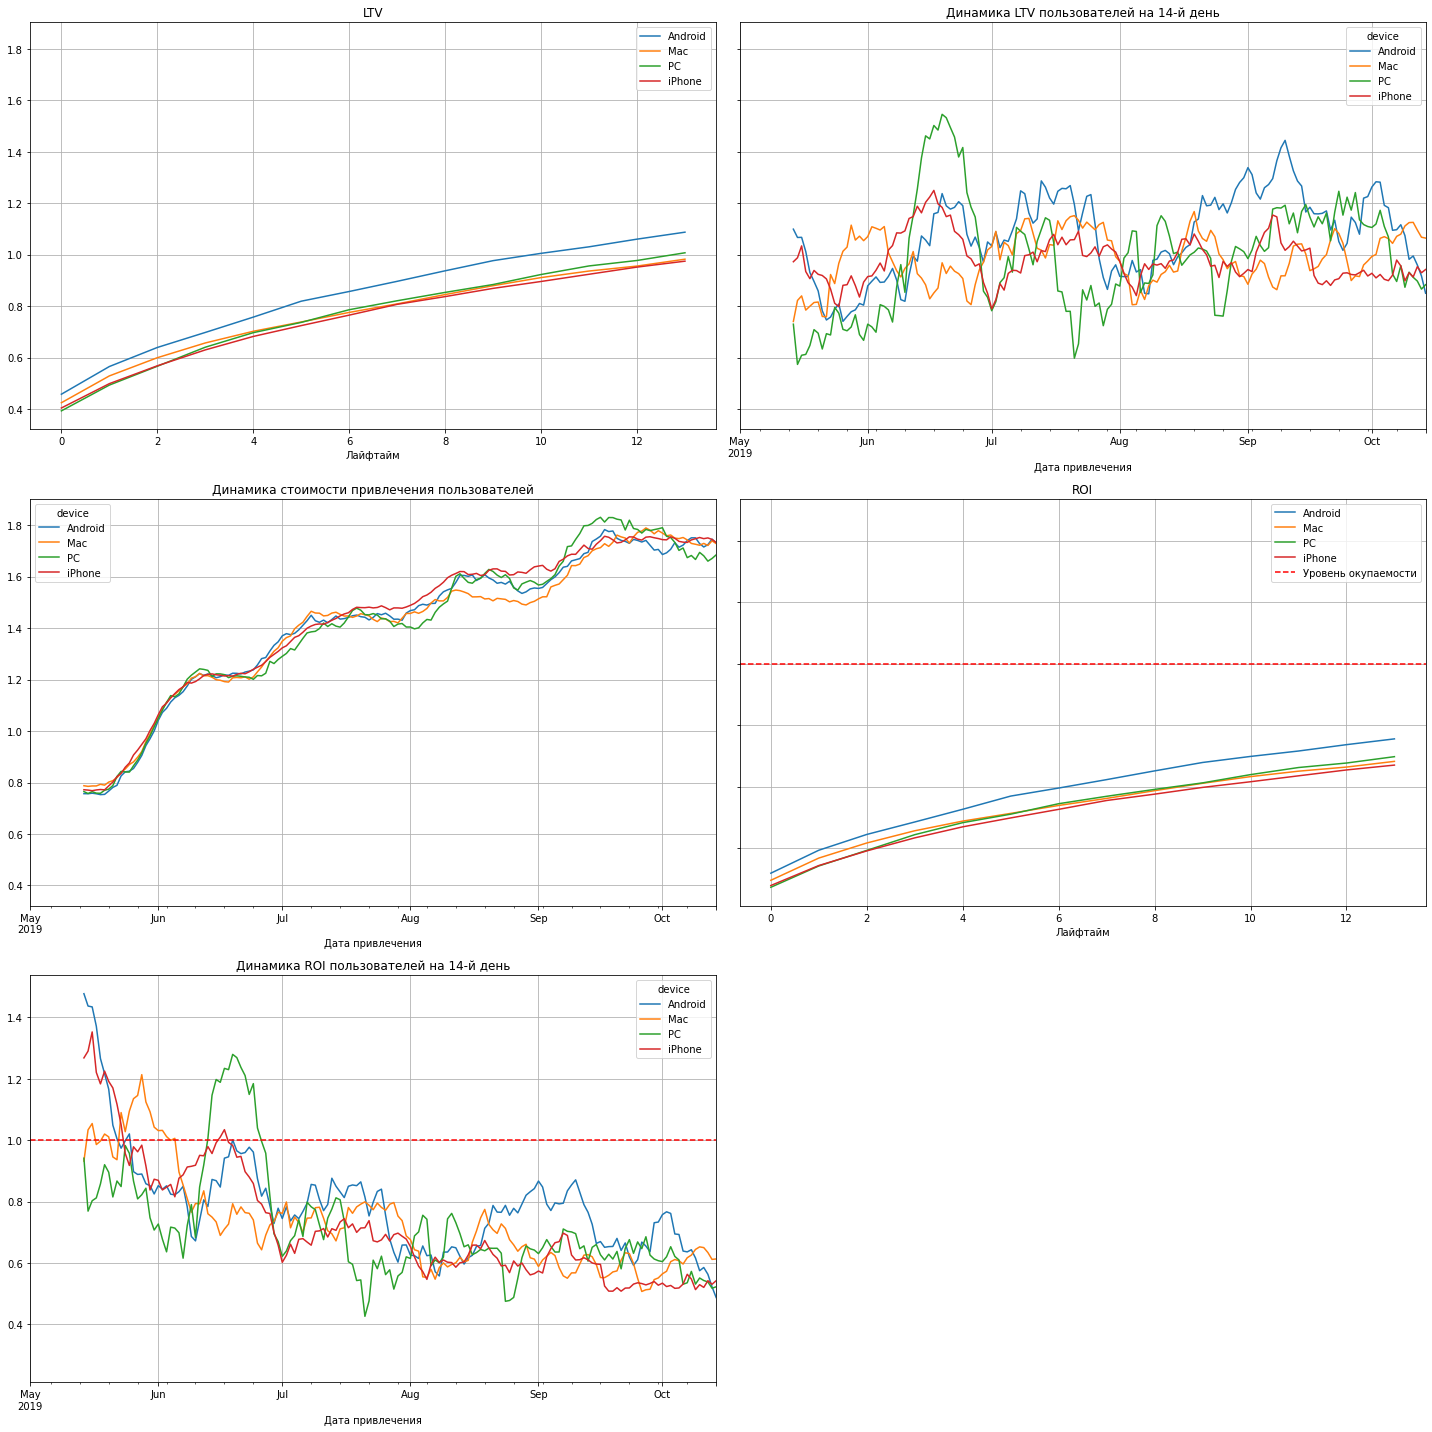

In [93]:
#Посмотрим на динамику по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
) 

В США динамика стоимости привлечения пользователей была практически одинаковой для всех устройств. Ни одно устройство не окупилось.

In [94]:
# Исключим из таблицы США
profiles_Europe = profiles.query('region != "United States"')

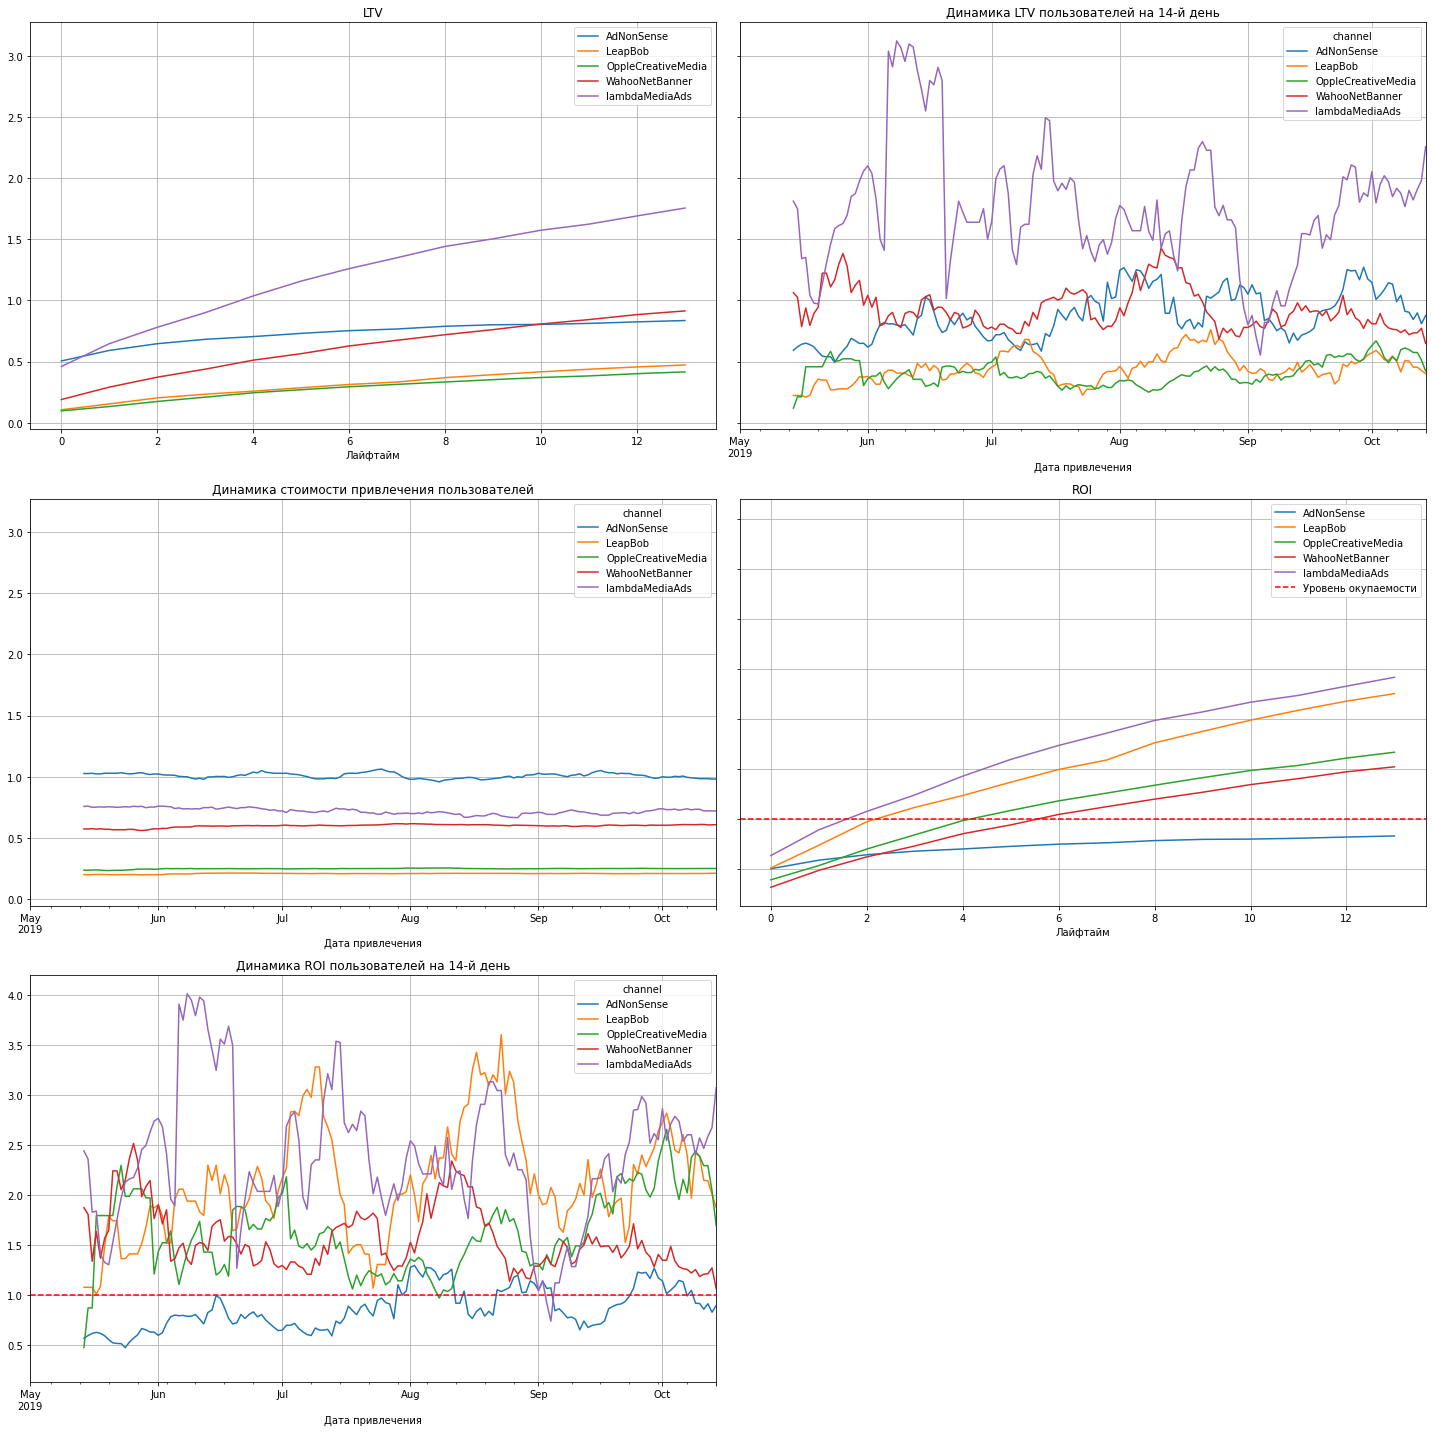

In [95]:
# Посмотрим окупаемость с разбивкой по источникам привлечения в Европе
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_Europe, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14)

В Европе наибольшая стоимость привлечения пользователей у AdNonSense и lambdaMediaAds, но наибольшее число пользователей приходи с каналов  LeapBob, OppleCreativeMedia и WahooNetBanner. По каналам LeapBob, OppleCreativeMedia и WahooNetBanner показатель выше уровня окупаемости, что не относится к AdNonSense. LTV AdNonSense ниже остальных. ROI не окупается у AdNonSense по данным динамики пользователей на 14 день. Высокий ROI у всех каналов, кроме AdNonSense.

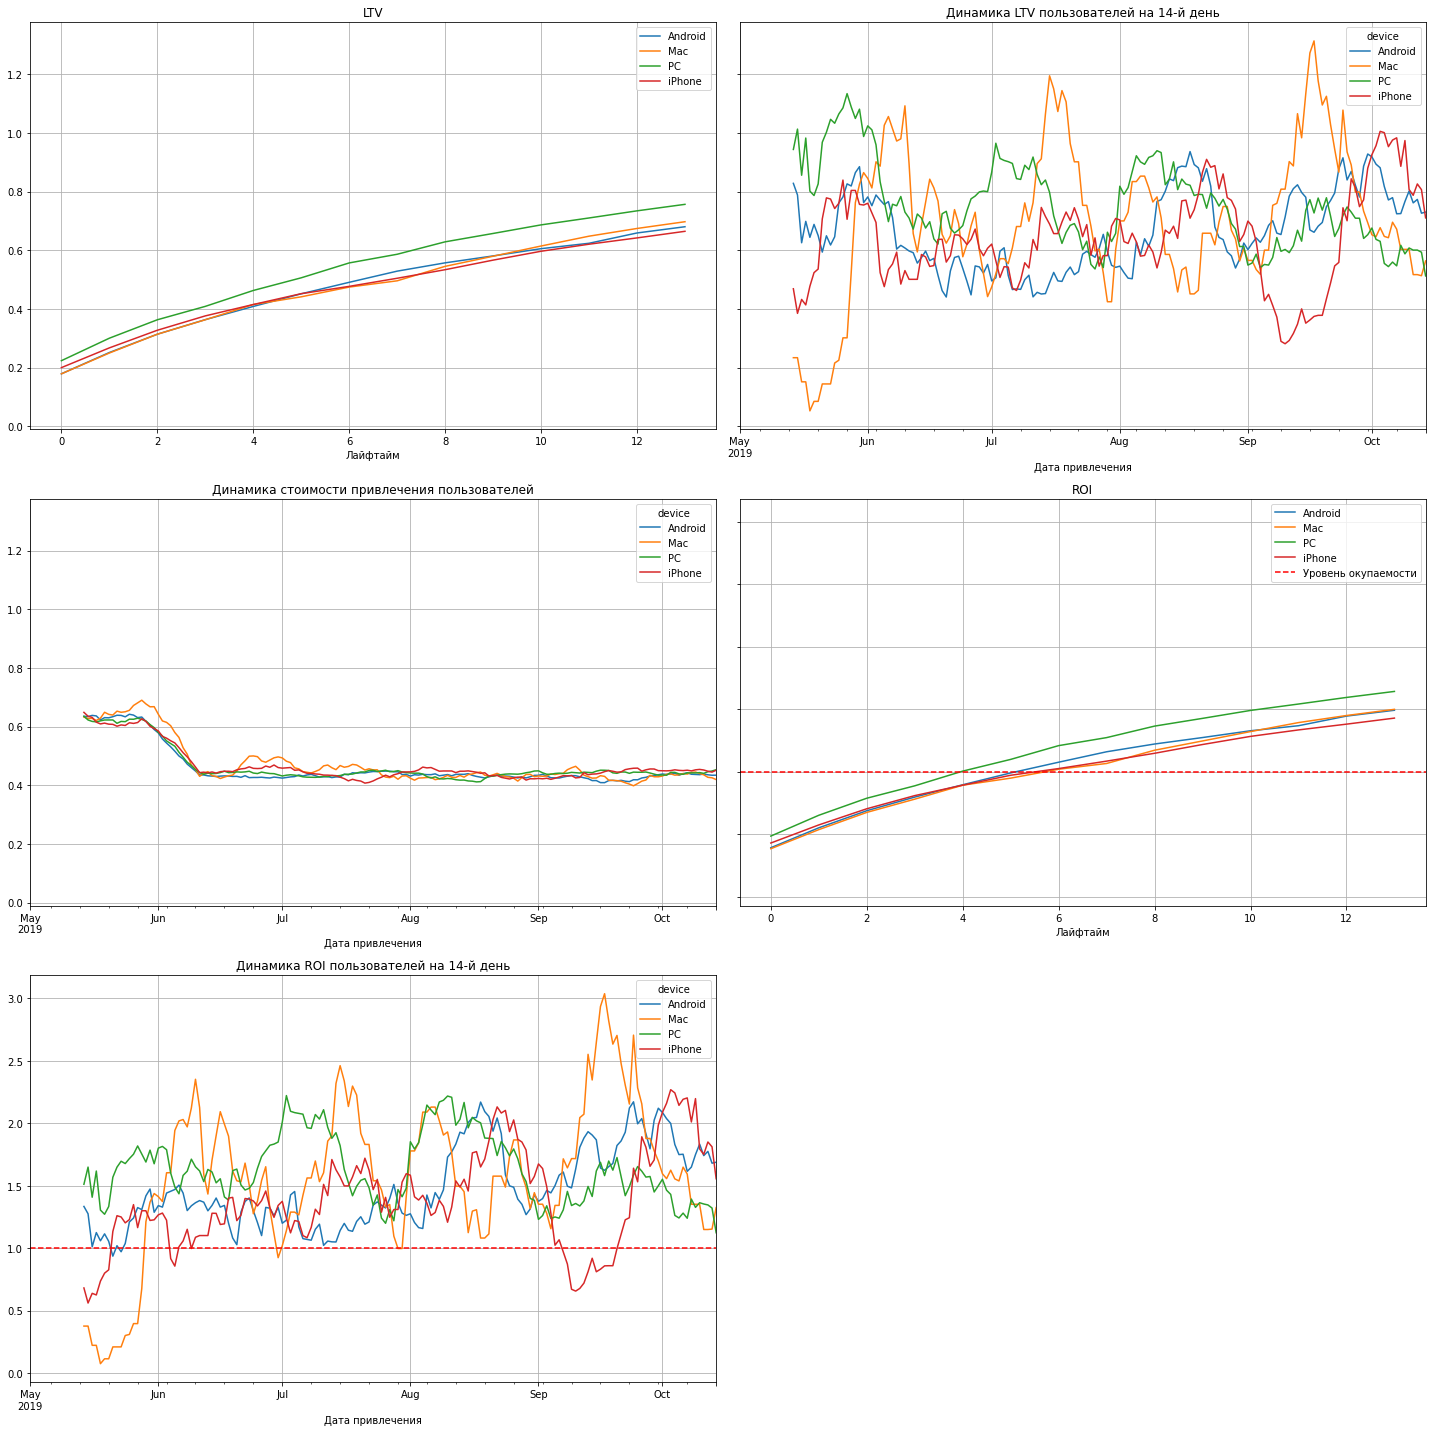

In [96]:
#Посмотрим на динамику по устройствам в Европе
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_Europe, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
) 

В Европе стоимость привлечения по всем устройствам была равная и снизилась после июня.ROI самый высокий у PC, все устройства окупились. Динамика ROI удержаняи пользователей по всем устройствам выше уровня окупаемости. LTV растет по всем устройствам.

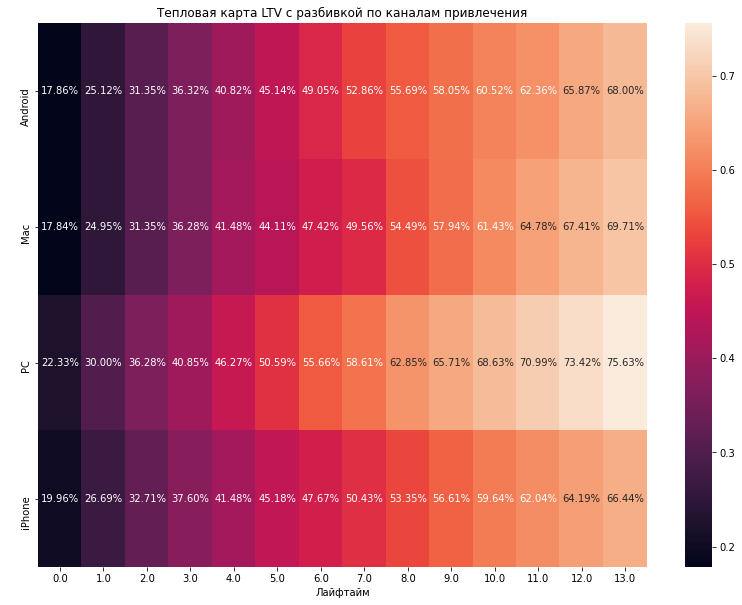

In [97]:
# Построим хитмэп LTV по всем каналам
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.2%', 
    ax=plt.subplot(1, 2, 2)
            )
plt.title('Тепловая карта LTV с разбивкой по каналам привлечения')
plt.xlabel('Лайфтайм')
plt.ylabel(' ')
plt.show()

- Затраты на рекламу в TipTop и FaceBoom не окупаются,
- Затраты  на рекламу TipTop увеличиваются каждый месяц,
- Перспективным может быть  lambdaMediaAds - низкая стоимость привлечения (0.72) и высокие показатели пожизненнаой ценности клиента.

cac
channel                 
TipTop          2.799003
FaceBoom        1.113286
AdNonSense      1.008054
lambdaMediaAds  0.724802

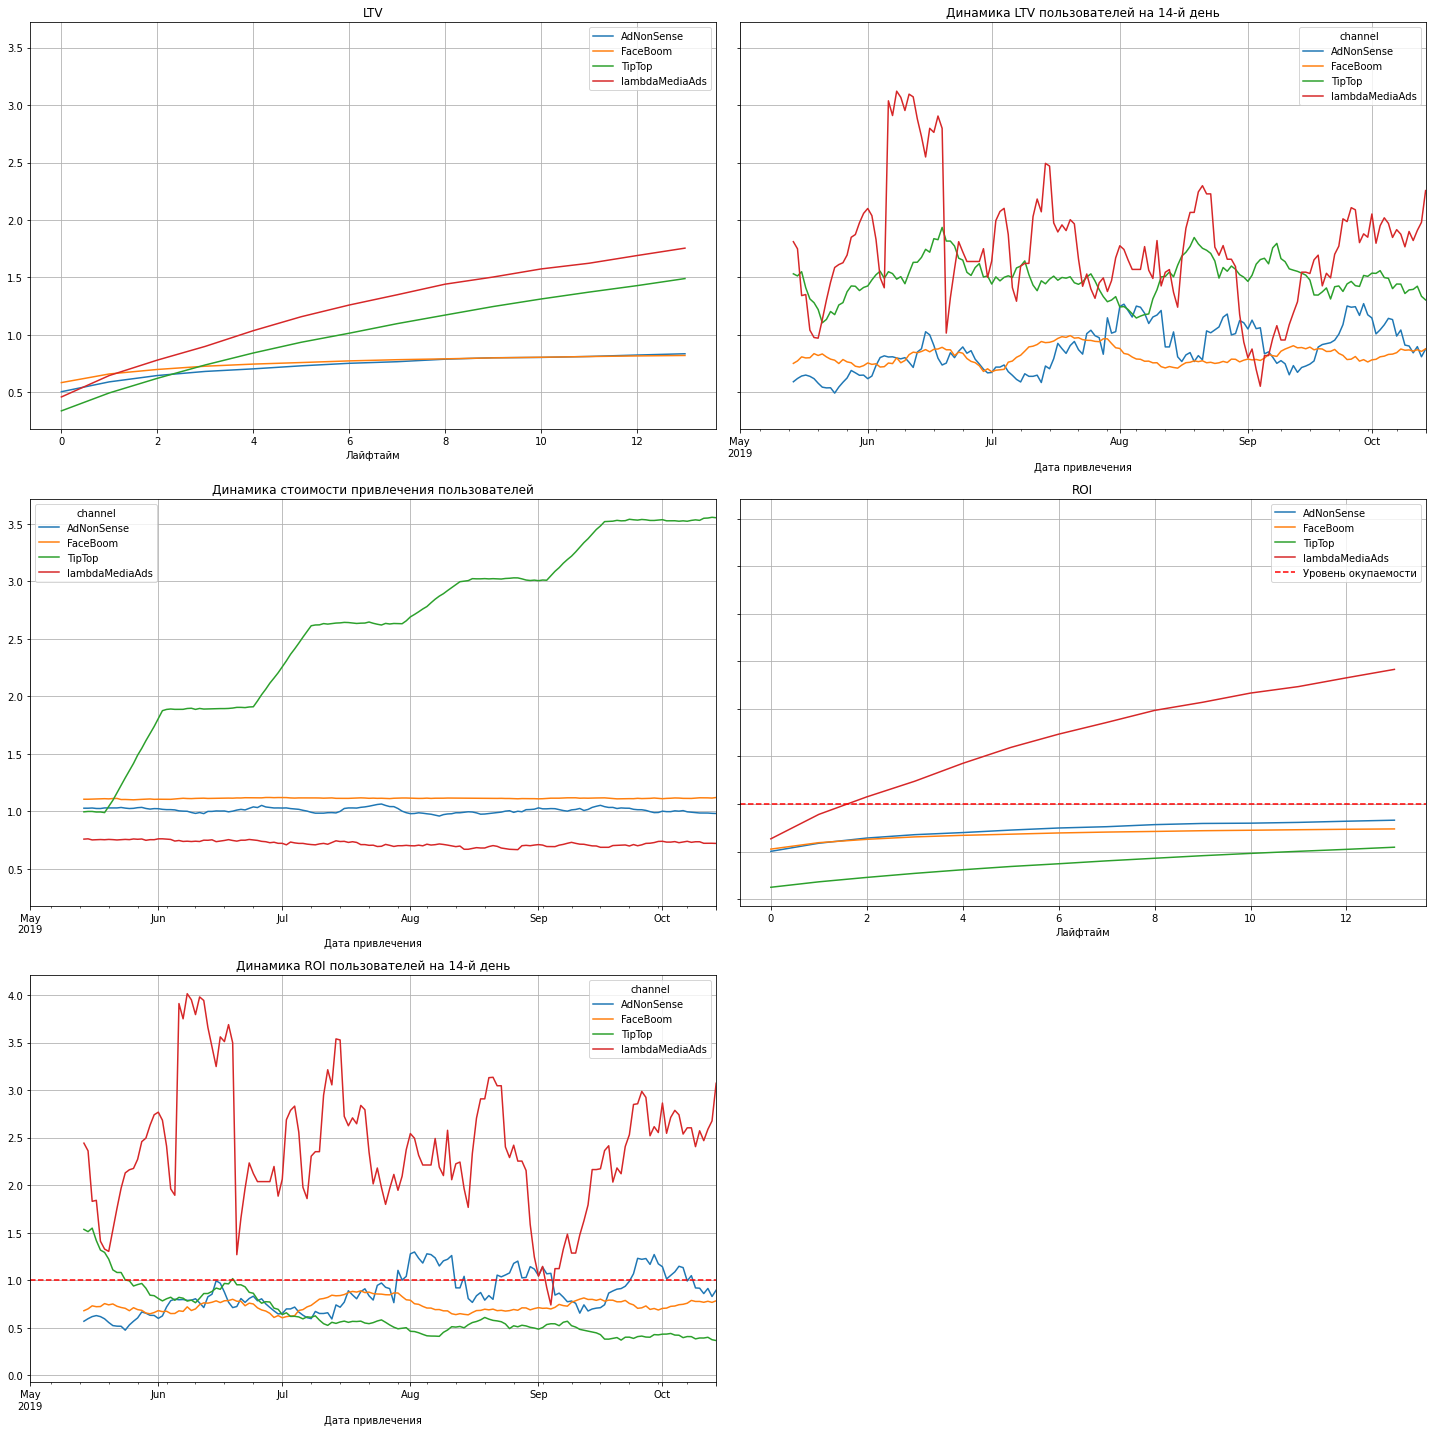

In [98]:
# Посчитаем LTV и ROI
display(cac_channel.head(4))

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel == ["TipTop", "FaceBoom", "lambdaMediaAds",  "AdNonSense"]'), orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

- Канал TipTop имеет самую высокую стоимость привлечения клиента, которая составляет примерно 2.799003.
- Среди представленных каналов FaceBoom имеет среднюю стоимость привлечения клиента, которая составляет около 1.113286.
- Канал AdNonSense также имеет среднюю стоимость привлечения клиента, немного выше, чем у FaceBoom, составляющую примерно 1.008054.
- lambdaMediaAds имеет самую низкую среди всех представленных каналов стоимость привлечения клиента, около 0.724802.

Исходя из этих данных, компания может оптимизировать свои рекламные бюджеты, сосредотачиваясь на каналах с более низкой стоимостью привлечения клиента и увеличивая инвестиции в эти каналы для максимизации окупаемости рекламных кампаний.

1. Окупается ли реклама, направленная на привлечение пользователей в целом?

В результате анализа ROI (возврата инвестиций) определили, что ROI находится ниже уровня окупаемости, таким образом это означает, что затраты на привлечение клиентов превышают доходы, которые эти клиенты приносят. Затраты на рекламу в целом не окупаются.

2. Какие устройства могут оказывать негативное влияние на окупаемость рекламы?

Так как устройства с высокой стоимостью привлечения клиента (CAC), но низкой конверсией или LTV, могут негативно сказываться на окупаемости рекламы, сделаем вывод по анализу устройств:

- Mac и iPhone имеют высокую стоимость привлечения клиента, что означает, что компания тратит значительные средства на привлечение пользователей с этих устройств.
- Несмотря на высокие затраты на привлечение, ROI (возврат на инвестиции) от пользователей с устройств Mac и iPhone низкий. Это может указывать на то, что пользователи этих устройств приносят меньше дохода по сравнению с затратами на их привлечение.
- Несмотря на низкий ROI, LTV (жизненная стоимость клиента) для пользователей с устройств Mac и iPhone выше, чем у других устройств. Это может свидетельствовать о том, что пользователи этих устройств, хоть и малочисленные, могут быть более лояльными и готовыми совершать повторные покупки или использовать услуги компании в течение долгого времени.
- Важно отметить, что, несмотря на высокий LTV, конверсия пользователей с устройств Mac и iPhone ниже, чем у Android и PC. Это может свидетельствовать о том, что привлеченные пользователи с этих устройств имеют более высокий порог входа или меньшую склонность к совершению покупок.

- Устройства Android и PC имеют более низкую стоимость привлечения клиента по сравнению с устройствами Mac и iPhone. Это означает, что компания тратит меньше средств на привлечение пользователей с устройств Android и PC.
- ROI устройств PC выше уровня окупаемости, что свидетельствует о том, что затраты на привлечение клиентов через устройства PC окупаются. В то время как устройства Android имеют ROI ниже уровня окупаемости, что означает, что затраты на привлечение клиентов через устройства Android не окупаются.
- Устройства Mac и iPhone имеют более высокую LTV по сравнению с устройствами Android и PC. Это означает, что пользователи с устройств Mac и iPhone, скорее всего, приносят больше дохода компании на протяжении всего жизненного цикла, чем пользователи с устройств Android и PC.
- Снижение конверсии у устройств Android и PC меньше, чем у устройств Mac и iPhone. Это может означать, что, хотя конверсия у устройств Android и PC ниже, это снижение менее значительно по сравнению с устройствами Mac и iPhone.

Вывод: устройства Mac и iPhone, несмотря на высокую стоимость привлечения клиентов, имеют низкий ROI. Однако, их высокая LTV может компенсировать эти затраты в долгосрочной перспективе. С другой стороны, устройства Android и PC имеют более низкую стоимость привлечения и более высокий ROI, однако их LTV ниже. Это означает, что компания может столкнуться с низкими конверсиями от пользователей Android и PC. Тем не менее, снижение конверсии у устройств Android и PC является менее значительным, чем у устройств Mac и iPhone, что может указывать на потенциальную перспективу увеличения конверсии с помощью оптимизации маркетинговых кампаний и улучшения пользовательского опыта.

3.  Какие страны могут оказывать негативное влияние на окупаемость рекламы?

Так как страны с низкой покупательской способностью аудитории или высоким уровнем конкуренции также могут оказывать негативное влияние на окупаемость, сделаем вывод по странам:

- LTV для США является самым высоким, а для Франции - самым низким. Это может указывать на то, что пользователи из США приносят больше дохода на протяжении всего их срока жизни, в то время как пользователи из Франции менее прибыльны для компании.
- Сильный и резкий рост CAC в США является тревожным сигналом, особенно если ROI находится ниже уровня окупаемости. В других странах наблюдается снижение CAC, что может быть положительным сигналом для окупаемости рекламы.
- Уровень ROI в США ниже уровня окупаемости, в то время как для остальных стран ROI выше этого уровня. Это означает, что вложения в рекламу в США могут быть менее эффективными по сравнению с другими странами.
- Самая высокая конверсия наблюдается в США, что может свидетельствовать о более активной и заинтересованной аудитории в этой стране. Однако, несмотря на высокую конверсию, низкий ROI и рост CAC могут указывать на то, что пользователи из США могут быть менее прибыльными для компании в долгосрочной перспективе.

Вывод: США могут оказывать наибольшее негативное влияние на окупаемость рекламы из-за сочетания высокой стоимости привлечения клиентов, низкого ROI и высокой конверсии.

4. Какие рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Так как рекламные каналы с высокой стоимостью привлечения клиента и низким ROI также могут быть неэффективными и отрицательно влиять на окупаемость рекламы, проанализируем рекламные каналы:

- AdNonSense:
- Демонстрирует наибольшее снижение удержания платящих пользователей со временем.
- Низкий уровень конверсии у платящих пользователей.
- Высокий рост стоимости привлечения пользователей.
- Низкий ROI.
Может оказывать негативное влияние на окупаемость рекламы из-за снижения удержания платящих пользователей и невыгодного соотношения между стоимостью привлечения и доходом.


- TipTop:
- Показывает значительное снижение удержания платящих пользователей и низкий уровень конверсии у них.
- Отмечается резкое увеличение стоимости привлечения пользователей.
- Низкий ROI.
- Наблюдается низкая динамика ROI пользователей на 14 день.

Может оказывать негативное влияние на окупаемость рекламы из-за роста стоимости привлечения и низкого уровня ROI.
Оба этих канала (AdNonSense и TipTop) выделяются негативными тенденциями в удержании платящих пользователей, росте стоимости привлечения и низком ROI, что может снизить эффективность рекламной кампании и оказать негативное влияние на ее окупаемость.

- FaceBoom:
- Наблюдается снижение показателя удержания платящих пользователей со временем, хотя не такое резкое, как у каналов AdNonSense и TipTop.
- FaceBoom демонстрирует высокую конверсию, что обычно считается положительным показателем. Однако, несмотря на высокую конверсию, если наблюдается снижение удержания платящих пользователей и низкий ROI, это может свидетельствовать о проблемах с качеством привлеченных пользователей или эффективностью монетизации.
- Низкий ROI у канала FaceBoom указывает на то, что затраты на привлечение пользователей через этот канал могут превышать доходы, которые эти пользователи приносят. Это означает, что эффективность рекламной кампании через FaceBoom может быть ниже ожидаемой.
- Низкая динамика ROI пользователей на 14 день также является тревожным сигналом, указывающим на нестабильность эффективности рекламы через этот канал в долгосрочной перспективе.

Таким образом, хотя конверсия у канала FaceBoom высока, наблюдаются проблемы с удержанием платящих пользователей, низкий ROI и нестабильность эффективности рекламы на долгосрочной основе, что может оказывать негативное влияние на окупаемость рекламной кампании.

3. Чем могут быть вызваны проблемы окупаемости?

Проблемы с окупаемостью могут быть вызваны различными факторами, такими как недостаточно целевая аудитория, низкое качество рекламного контента, неэффективное использование бюджета рекламы, сезонные колебания спроса, изменения в маркетинговой стратегии или технические проблемы на сайте или в приложении.

- Каналы AdNonSense и TipTop демонстрируют наибольшие проблемы с окупаемостью. У них наблюдается снижение удержания платящих пользователей, высокие затраты на привлечение и низкий ROI.
- FaceBoom, хотя и имеет высокую конверсию, но также сталкивается с проблемами в удержании платящих пользователей и низким ROI.
- Канал YRabbit выделяется более высоким ROI, что может свидетельствовать о его эффективности по сравнению с другими каналами.
- Перспективным может быть lambdaMediaAds - низкая стоимость привлечения (0.72) и высокие показатели пожизненнаой ценности клиента.

- Страны с высоким уровнем LTV, такие как США, имеют более высокую стоимость привлечения клиента, но также и более высокий ROI. Снижение ROI в США может свидетельствовать о растущей конкуренции или неэффективности маркетинговых стратегий.
- Франция имеет самый низкий уровень LTV, что может указывать на проблемы с монетизацией или низкой лояльностью клиентов.

- Устройства Mac и iPhone имеют высокую стоимость привлечения, низкий ROI, но высокий уровень LTV. Это может свидетельствовать о проблемах в монетизации или неэффективности маркетинговых стратегий для этой аудитории.
- Устройства Android и PC имеют более низкую стоимость привлечения и более высокий ROI, но ниже уровень LTV. Это может указывать на проблемы с конверсией или монетизацией пользователей с этих устройств.

## Вывод

1. Выделим причины неэффективности привлечения пользователей.

-  Высокие рекламные затраты на привлечение пользователей посредством каналов FaceBoom, TipTop в США и AdNonSence в Европе:
- высокая стоимость привлечения у этих каналов, с горизонтом событий в две недели она не окупается;
- при этом, платящие пользователи FaceBoom и AdNonSence очень плохо удерживаются;
- реклама через канал TipTop оказалась неэффективной, расходы на привлечение в TipTop выросли почти в три раза;

- Проблемы с окупаемостью по всем устройствам (Mac, iPhone, Android),кроме PC;

- Пользователи iPhone и Android показывали окупаемость только в начальный период, что может быть связано с временными кампаниями или акциями, привлекающими внимание пользователей мобильных устройств;

2. Рекомендации для отдела маркетинга.

- Регион United States - основной рынок для приложения. Рекомендуется пересмотреть подходы к работе с рекламными источниками TipTop и FaceBoom в целях  оптимизации расходов и улучшения качества привлекаемых пользователей;
- Европе рекомендуется  перераспределить бюджет с канала AdNonSense на более эффективные каналы, такие как LeapBob, OppleCreativeMedia и WahooNetBanner, которые показывают более высокий уровень окупаемости.
- Поработать с органическими пользователями: это существенная часть посетителей приложения;
- Привлекать больше PC и Android пользователей,чтобы повысить их LTV и удержание; 
- Перераспределить рекламный бюджет с неэффективных источников в США на MediaTornado, RocketSuperAds, YRabbit.
- Так как основные пользователи приложения это пользователи мобильныех устройств, предусмотреть маркетинговые стратегии для их удержания;
- Провести более детальный анализ конкурентной среды и целевой аудитории для устройств Mac и iPhone, чтобы определить эффективные стратегии привлечения с более низкими затратами.
- Рекомендуется рассмотреть возможность увеличения бюджета по США на каналы RocketSuperAds, MediaTornado и YRabbit, учитывая их эффективность и низкую стоимость привлечения.



Не рекомендуется вкладываться в канал `Yrabbit`.  Канал сейчас окупается, потому что там низкий CAC. Фактически мы сейчас сильно много не платим за новых клиентов (CAC = 0,21) . И уже на этих клиентах (которые обошлись нам недорого) мы сможем спрогнозировать будущую картину. Они имеют низкую конвертируемость и сильно падающее удержание на последних днях горизонта. Т.е. можно сделать вывод, что им не интересно наше приложение. Возможно, это просто не наша аудитория. Они не заинтересованы в нашем приложении